<a href="https://colab.research.google.com/github/MCK-OOTS/DataVisualization/blob/main/DataVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 최근 심각한 사회문제로 대두되는 대한민국의 출산율과 관련된 데이터 분석

1. KOSIS 국가통계 포털에서 제공하는 API 데이터사용
2. OECD data exploer에서 제공하는 API 데이터 사용







**한글 설치**

In [1]:
#한글 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

**데이터 수집**<br>
0. 2023년 대한민국 인구 구조 데이터 받아오기

In [2]:
#대한민국 인구구조
import requests
import json
import pandas as pd

# API URL (KOSIS 국가 통계 포털)
url = "https://kosis.kr/openapi/Param/statisticsParameterData.do"

# 요청 파라미터
params = {
    "apiKey": "OWVmNjBiOTgzZjhiNzYyNjYwNjU0YWUxYTNkYTAzMWM=",  # API 키
    "itmId": "T01+T02+",  # 데이터 분류 코드
    "objL1": "00+",  # 데이터 분류 코드
    "objL2": "005+010+015+020+025+030+035+040+045+050+055+060+065+070+075+080+085+090+095+100+",  # 데이터 분류 코드
    "format": "json",  # 응답 형식
    "jsonVD": "Y",  # JSON 형식
    "prdSe": "Y",  # 기간별 데이터 요청
    "newEstPrdCnt": "1",  # 최신 3년 데이터
    "orgId": "101",  # 데이터 제공 조직 ID (통계청)
    "tblId": "DT_1IN1503",  # 테이블 ID (인구 구조 관련 테이블)
}


# API 요청 보내기
response = requests.get(url, params=params)

# JSON 데이터 파싱 및 데이터 확인
population_data = response.json()
#print(population_data)

**데이터 가공/공제**<br>
0.2023년 대한민국 인구 수 데이터 가공/공제
- 인구 수 데이터를 수치 데이터로 변경
- 남성, 여성의 데이터를 나눈다
- 연령대(C2_NM)와 인구 수(DT)를 인덱스로 잡고 연령대와 인구 수를 설정한다.

In [3]:
df_population = pd.DataFrame(population_data)# list > DataFrame
df_population= df_population[['PRD_DE','ITM_NM' ,'C2_NM', 'DT']]#원하는 데이터 키 값만 저장

df_population['DT'] = pd.to_numeric(df_population['DT'])#수치화 데이터로 변경

# 남성과 여성 데이터 나누기
male_data = df_population[df_population['ITM_NM'] == '총인구_남자(명)']
female_data = df_population[df_population['ITM_NM'] == '총인구_여자(명)']

# 연령대별 인구 수를 각각 설정
male_population = male_data[['C2_NM', 'DT']].set_index('C2_NM')['DT']
female_population = female_data[['C2_NM', 'DT']].set_index('C2_NM')['DT']
print(male_population.head())
print(female_population.head())

C2_NM
0~4세       697702
5~9세      1014945
10~14세    1170779
15~19세    1186270
20~24세    1529757
Name: DT, dtype: int64
C2_NM
0~4세       664035
5~9세       965081
10~14세    1106884
15~19세    1112069
20~24세    1385901
Name: DT, dtype: int64


**데이터 시각화**<br>
0.대한민국 인구 구조 시각화
- 수평 막대그래프를 이용하여 여성의 데이터를 음스로 바꿔서 남녀의 그래프가 겹치지 않도록 시각화

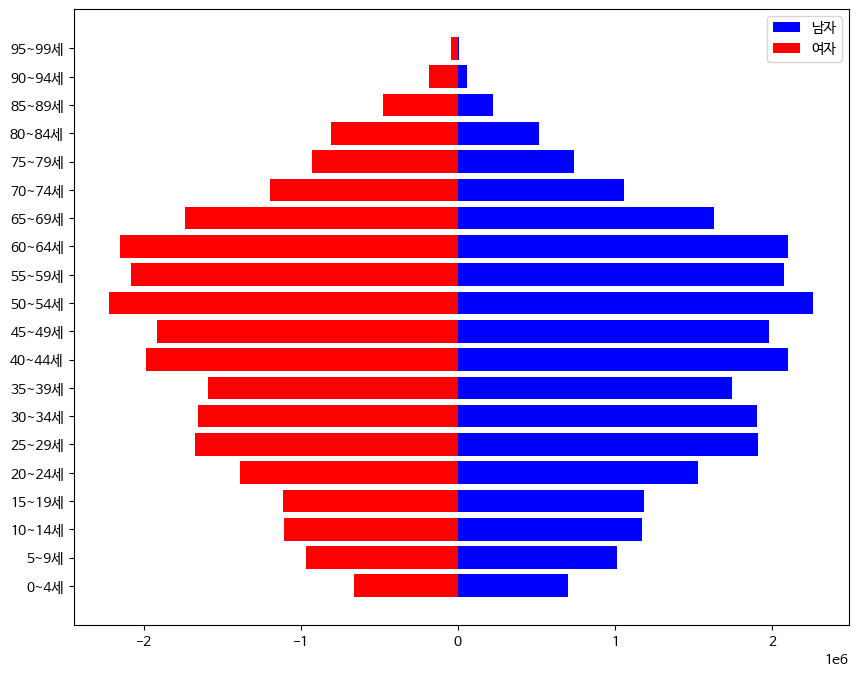

In [4]:
# 피라미드 형식으로 시각화 (여성 데이터를 음수로 바꿔서 왼쪽에 표시)
plt.figure(figsize=(10, 8))
plt.barh(male_population.index, male_population, color='blue', label='남자')
plt.barh(female_population.index, -female_population, color='red', label='여자')
#범례 추가
plt.legend()

**데이터 수집**<br>
1. 출산율 데이터(2000~2021년) 받아오기
- Kosis에서 21년도 까지의 데이터만 제공
- Kosis API는 기본적으로 JSON형식으로 데이터를 제공한다.


In [5]:
#출산율
# API URL (KOSIS 국가 통계 포털)
url = "https://kosis.kr/openapi/Param/statisticsParameterData.do"

#요청 파라미터
params = {
    "apiKey": "OWVmNjBiOTgzZjhiNzYyNjYwNjU0YWUxYTNkYTAzMWM=",
    "itmId": "T1+", #데이터 분류 코드
    "objL1": "ALL", #데이터 분류 코드
    "format": "json",
    "jsonVD": "Y",
    "prdSe": "Y",
    "newEstPrdCnt": "22",
    "orgId": "101", #데이터 제공 조직 ID (통계청, WorldBank)
    "tblId": "DT_2AX016", #조회 테이블 ID (출산율)
}

# API 요청 보내기
response = requests.get(url, params=params)

# JSON 데이터 파싱 및 데이터 확인
fertility_data = response.json()
#print(fertility_data)

**데이터 가공/정제**<br>
1. 출산율 데이터를 2가지로 나눠서 DataFrame으로 저장한다.
- df_fertility
-- 대한민국, 독일, 프랑스, 일본, 이탈리아의 출산율 데이터를 저장(대표적인 출산율 개선국가(독일), 높은 출산율국가(프랑스)와 대표적인 저출산국가(일본,이탈리아))

- df_all_fertility
-- 받아온 데이터 중에서 2021년도 데이터만 추출
-- 기본적으로 데이터는 수치 데이터가 아니기 때문에 정렬을 위해 astype()을 이용해 float형으로 변환
-- float형으로 형변환한 DF을 오름차순으로 정렬 후 head()를 이용해 10개의 국가만 추출
-- 출산율 하위 10개 국가의 데이터만 저장

In [6]:
#전처리
df_fertility = pd.DataFrame(fertility_data)# list > DataFrame
df_fertility= df_fertility[['PRD_DE', 'C1_NM', 'DT']]#원하는 데이터 키 값만 저장
#대표적인 저출산국가(일본,이탈리아)와 높은 출산울(프랑스), 출산율 개선국가(독일)의 출산율 변화 비교
df_fertility= df_fertility[df_fertility['C1_NM'].isin(['대한민국', '일본','프랑스','독일','이탈리아'])]#원하는 국가의 데이터만 저장
df_fertility.columns = ['연도', '국가', '출산율(명)']# 데이터 컬럼 이름 변경
#저출산국가와 높은 출산율 국가 데이터를 다시 분리
df_high_fertility = df_fertility[df_fertility['국가'].isin(['프랑스', '독일', '대한민국'])]
df_low_fertility = df_fertility[df_fertility['국가'].isin(['일본','이탈리아','대한민국'])]


#전 세계 데이터
df_all_fertility = pd.DataFrame(fertility_data)# list > DataFrame
df_all_fertility = df_all_fertility [['PRD_DE', 'C1_NM', 'DT']]#원하는 데이터 키 값만 저장
df_all_fertility = df_all_fertility[df_all_fertility['PRD_DE'] == '2021']  # 2021년도 데이터만 저장
df_all_fertility.columns = ['연도', '국가', '출산율(명)']# 데이터 컬럼 이름 변경

#하위 10개국 데이터만 저장
df_all_fertility['출산율(명)'] = df_all_fertility['출산율(명)'].astype(float)  #하위 50개 국가 필터링을 위해 데이터를 float로 변경
df_all_fertility = df_all_fertility.sort_values(by="출산율(명)", ascending=True).head(10) #오름차순 정렬 후 10개의 국가 데이터만 저장

print(df_fertility)
print(df_all_fertility)

        연도    국가 출산율(명)
22    2000  대한민국   1.48
23    2001  대한민국  1.309
24    2002  대한민국  1.178
25    2003  대한민국  1.191
26    2004  대한민국  1.164
...    ...   ...    ...
2486  2017  이탈리아   1.32
2487  2018  이탈리아   1.29
2488  2019  이탈리아   1.27
2489  2020  이탈리아   1.24
2490  2021  이탈리아   1.25

[110 rows x 3 columns]
        연도         국가  출산율(명)
329   2021         홍콩   0.772
43    2021       대한민국   0.808
1825  2021     푸에르토리코   0.907
1407  2021  영국령버진아일랜드   1.005
637   2021        마카오   1.088
879   2021       싱가포르   1.120
2622  2021         몰타   1.140
2909  2021      우크라이나   1.160
241   2021         중국   1.164
1275  2021        아루바   1.180


 **데이터 시각화**<br>
 1. 출산율 하위 10개국가 시각화
- barch를 이용해 수평 그래프로 시각화

<BarContainer object of 10 artists>

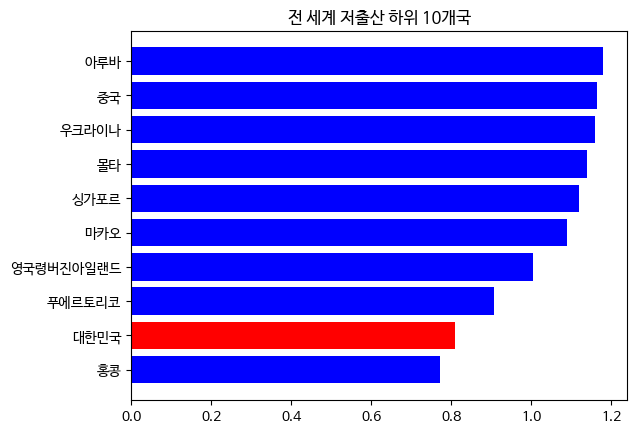

In [7]:
#2021 저출산 10개국가
#그래프 시각화
plt.title('전 세계 저출산 하위 10개국')
plt.barh(
    df_all_fertility['국가'],
    df_all_fertility['출산율(명)'],
    color=['blue' if country != '대한민국' else 'red' for country in df_all_fertility['국가']]
)

**데이터시각화**<br>
1-1. 대한민국, 일본, 이탈리아, 독일, 프랑스의 2000년대 출산율 추이 시각화
- 시각화 하기위해 수치데이터로 변경
- lineplot을 이용해 연도별 변화를 시각화
- df_low_fertility
-- 대한민국과 저출산국가(일본, 이탈리아)
- df_high_fertility
-- 대한민국과 높은 출산율 국가(독일, 프랑스)

<ipython-input-8-cffffa142bf3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high_fertility['출산율(명)'] = pd.to_numeric(df_high_fertility['출산율(명)'])
<ipython-input-8-cffffa142bf3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_low_fertility['출산율(명)'] = pd.to_numeric(df_low_fertility['출산율(명)'])


Text(0.5, 1.0, '대한민국, 프랑스, 독일 출산율 추이')

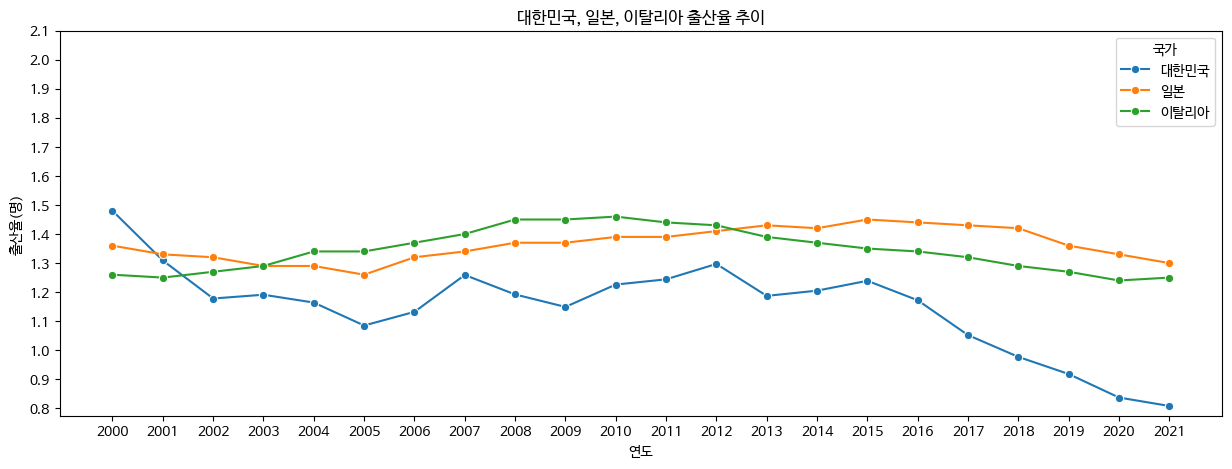

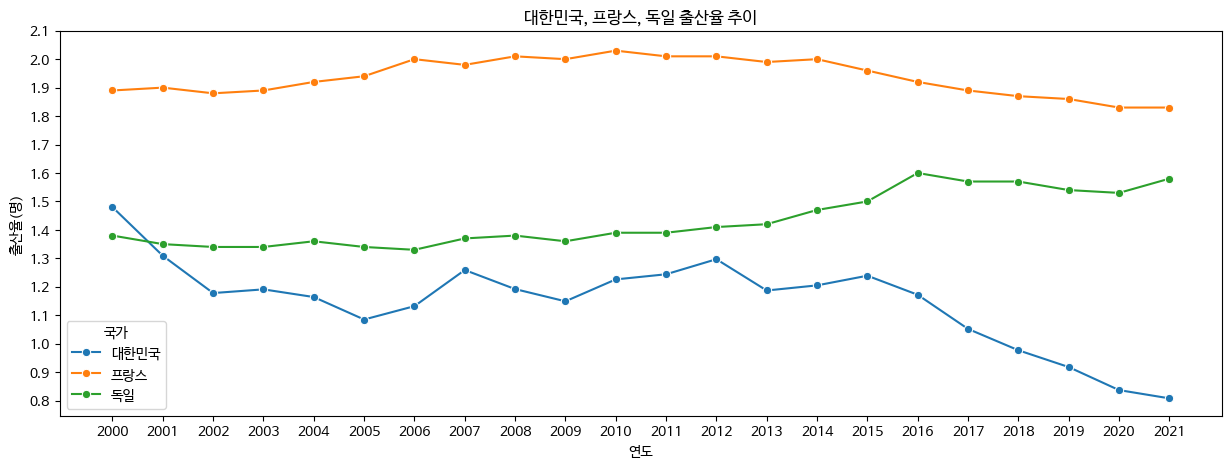

In [8]:
import seaborn as sns
import numpy as np

#대표적인 저출산국가(일본,이탈리아)와 높은 출산울(프랑스), 출산율 개선국가(독일)의 출산율 변화 비교

#수치데이터 변경
df_high_fertility['출산율(명)'] = pd.to_numeric(df_high_fertility['출산율(명)'])
df_low_fertility['출산율(명)'] = pd.to_numeric(df_low_fertility['출산율(명)'])

#lineplot으로 시각화
plt.figure(figsize=(15, 5))
sns.lineplot(x='연도', y='출산율(명)', data=df_low_fertility, marker='o', hue='국가')
plt.yticks(np.arange(0.8, 2.2, 0.1))
plt.title("대한민국, 일본, 이탈리아 출산율 추이")

plt.figure(figsize=(15, 5))
sns.lineplot(x='연도', y='출산율(명)', data=df_high_fertility, marker='o', hue='국가')
plt.yticks(np.arange(0.8, 2.2, 0.1))
plt.title("대한민국, 프랑스, 독일 출산율 추이")

**데이터수집**<br>
2. 고용률 데이터 수집
- 원하는 국가(대한민국, 일본, 이탈리아, 독일, 프랑스)의 데이터만 수집
- "objL1": "1005+1100+4075+4080+4120+"
-- 대한민국, 일본, 이탈리아, 독일, 프랑스의 국가코드

In [9]:
#고용률
params = {
    "apiKey": "OWVmNjBiOTgzZjhiNzYyNjYwNjU0YWUxYTNkYTAzMWM=",
    "itmId": "T1+", #데이터 분류 코드
    "objL1": "1005+1100+4075+4080+4120+",#데이터 분류 코드
    "objL2": "ALL",
    "format": "json",
    "jsonVD": "Y",
    "prdSe": "Y",
    "newEstPrdCnt": "25",
    "orgId": "101", #데이터 제공 조직 ID (통계청, WorldBank)
    "tblId": "DT_2KAA309", #조회 테이블 ID (고용률)

}

# API 요청 보내기
response = requests.get(url, params=params)

# JSON 데이터 파싱 및 데이터확인
hired_data = response.json()
#print(hired_data)

**데이터 가공/정제**
2. 고용률 데이터 가공/정제
- df_hired
-- 여성,남성, 전체의 2000년대 고용률 데이터를 저장

- df_hired_total
-- 2021연도의 전체 데이터만 저장

In [53]:
df_hired = pd.DataFrame(hired_data)#DF로 저장
df_hired= df_hired[['PRD_DE', 'C1_NM', 'C2_NM','DT']] # 원하는 데이터만 저장
df_hired.columns = ['연도', '국가', '성별구분', '고용률(%)']#컬럼 이름 변경

df_hired['고용률(%)'] = pd.to_numeric(df_hired['고용률(%)'])#수치화 데이터로 변경

#2023년도의 전체 고용율만 필터링
df_hired_total = df_hired[(df_hired['연도'] == '2023') & (df_hired['성별구분'] == '전체')]

print(df_hired)

       연도    국가 성별구분    고용률(%)
0    2000  대한민국   전체  61.51276
1    2001  대한민국   전체  62.20520
2    2002  대한민국   전체  63.40555
3    2003  대한민국   전체  63.03460
4    2004  대한민국   전체  63.76704
..    ...   ...  ...       ...
337  2019  이탈리아   여자  50.17500
338  2020  이탈리아   여자  48.42500
339  2021  이탈리아   여자  49.42500
340  2022  이탈리아   여자  51.12500
341  2023  이탈리아   여자  52.52500

[342 rows x 4 columns]


**데이터 시각화**<br>
2.고용율 데이터 시각화
- supplot을 사용해 대한민국 일본, 이탈리아, 독일, 프랑스의 고용률을 한눈에 들어올 수 있도록 시각화
- 2000년대 고용률 추이는 lineplot으로 시각화
- 2021년도의 고용률은 barplot으로 시각화

<Axes: title={'center': '2023년 고용률 비교 '}, xlabel='국가', ylabel='고용률(%)'>

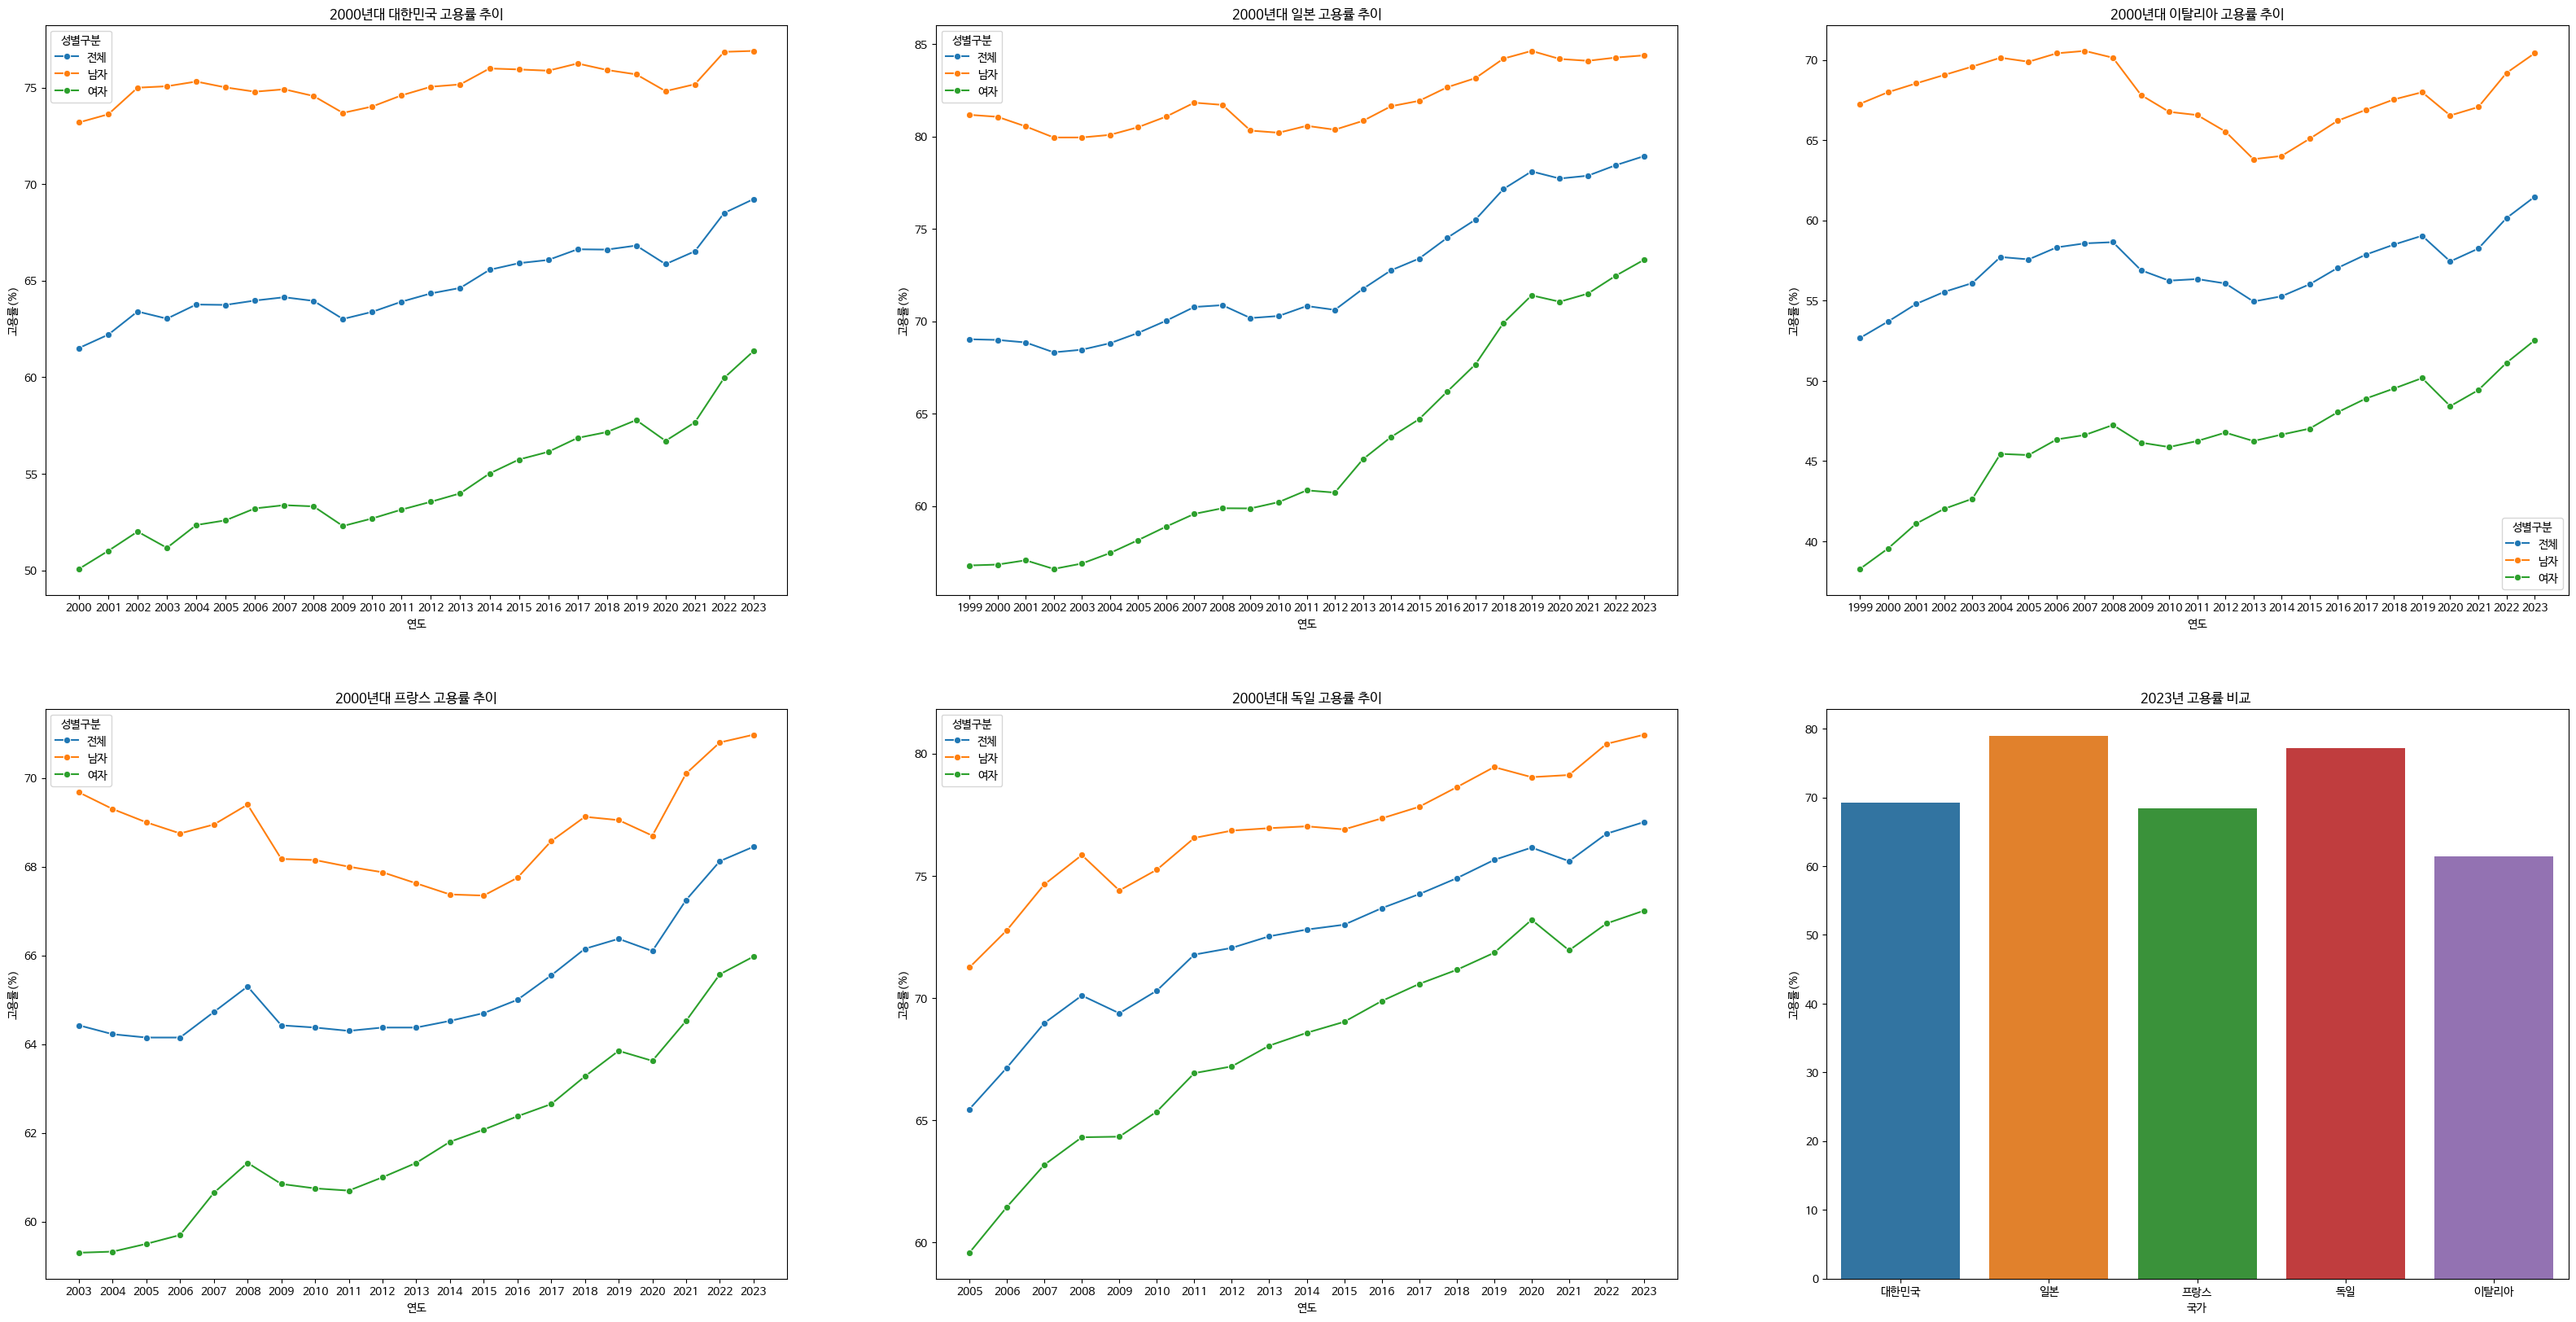

In [55]:
#고용률 비교

hired_sub_plot = plt.figure(figsize=(40, 20))#서브플롯으로 보기 쉽게 시각화

ax1=hired_sub_plot.add_subplot(2,3,1)
ax2=hired_sub_plot.add_subplot(2,3,2)
ax3=hired_sub_plot.add_subplot(2,3,3)
ax4=hired_sub_plot.add_subplot(2,3,4)
ax5=hired_sub_plot.add_subplot(2,3,5)
ax6=hired_sub_plot.add_subplot(2,3,6)

ax1.set_title('2000년대 대한민국 고용률 추이')
sns.lineplot(x='연도', y='고용률(%)', data=df_hired[(df_hired['국가'] == '대한민국')], marker='o', hue="성별구분", ax=ax1)

ax2.set_title('2000년대 일본 고용률 추이')
sns.lineplot(x='연도', y='고용률(%)', data=df_hired[(df_hired['국가'] == '일본')], marker='o', hue="성별구분", ax=ax2)

ax3.set_title('2000년대 이탈리아 고용률 추이')
sns.lineplot(x='연도', y='고용률(%)', data=df_hired[(df_hired['국가'] == '이탈리아')], marker='o', hue="성별구분", ax=ax3)

ax4.set_title('2000년대 프랑스 고용률 추이')
sns.lineplot(x='연도', y='고용률(%)', data=df_hired[(df_hired['국가'] == '프랑스')], marker='o', hue="성별구분", ax=ax4)

ax5.set_title('2000년대 독일 고용률 추이')
sns.lineplot(x='연도', y='고용률(%)', data=df_hired[(df_hired['국가'] == '독일')], marker='o', hue="성별구분", ax=ax5)

ax6.set_title('2023년 고용률 비교 ')
sns.barplot(x='국가', y='고용률(%)', data=df_hired_total, hue='국가',ax=ax6)

**데이터 수집**<br>
3.청년실업률 데이터 수집
- 출산율과 더불어 사회문제로 떠오른 청년실업

In [12]:
#청년 실업률

params = {
    "method": "getList",
    "apiKey": "OWVmNjBiOTgzZjhiNzYyNjYwNjU0YWUxYTNkYTAzMWM=",
    "itmId": "T10+",#데이터 분류 코드
    "objL1": "00+",#데이터 분류 코드
    "objL2": "1005+1100+4075+4080+4120+",#데이터 분류 코드
    "format": "json",
    "jsonVD": "Y",
    "prdSe": "Y",
    "newEstPrdCnt": "26",
    "orgId": "101", #데이터 제공 조직 ID (통계청, 국제통계연감)
    "tblId": "DT_2KAA348", #조회 테이블 ID (청년 실업률P)

}

# API 요청 보내기
response = requests.get(url, params=params)

# 응답 데이터 확인 및 JSON 데이터 파싱
unemploy_data = response.json()
#print(unemploy_data)

**데이터 가공/정제**<br>
3.청년 실업률 데이터 가공/정제
- 바로 DataFrame으로 저장시 scalar값 에러 발생
-- ValueError: If using all scalar values, you must pass an index
- 리스트에 데이터를 저장했다가 DF로 저장

In [13]:
# 단일 값(스칼라 값) 에러로인해 리스트로 저장 후 DF로 저장
data_list = []
for item in unemploy_data:
  data_list.append({
  "연도": item.get("PRD_DE"),
  "국가": item.get("C2_NM"),
  "청년 실업률(%)": item.get("DT")
})
df_unemploy = pd.DataFrame(data_list)

#2000~ 2021까지의 데이터만 저장 (2029년도 까지 데이터 제공)
df_unemploy = df_unemploy[df_unemploy['연도'].isin([str(year) for year in range(2000, 2022)])]

# 컬럼이름 변경
df_unemploy.columns = ['연도', '국가', '청년 실업률(%)']
print(df_unemploy)

       연도    국가 청년 실업률(%)
0    2000  대한민국    10.002
1    2001  대한민국     9.352
2    2002  대한민국       7.9
3    2003  대한민국     9.419
4    2004  대한민국     9.797
..    ...   ...       ...
121  2017  이탈리아    34.757
122  2018  이탈리아    32.197
123  2019  이탈리아    29.177
124  2020  이탈리아    29.412
125  2021  이탈리아     29.69

[110 rows x 3 columns]


**데이터 시각화**<br>
3.청년 실업률 데이터 시각화
- df_low_unemploy
-- 저출산 국가의(대한민국, 일본, 이탈리아) 청년 실업률
- df_high_unemploy
-- 높은 출산율 국가의(대한민국, 독일, 프랑스) 청년 실업률
- 2000년대 청년 실업률 추이를 보기위해 lineplot으로 시각화

Text(0.5, 1.0, '대한민국, 독일, 프랑스의 청년(15~24세) 실업률 추이')

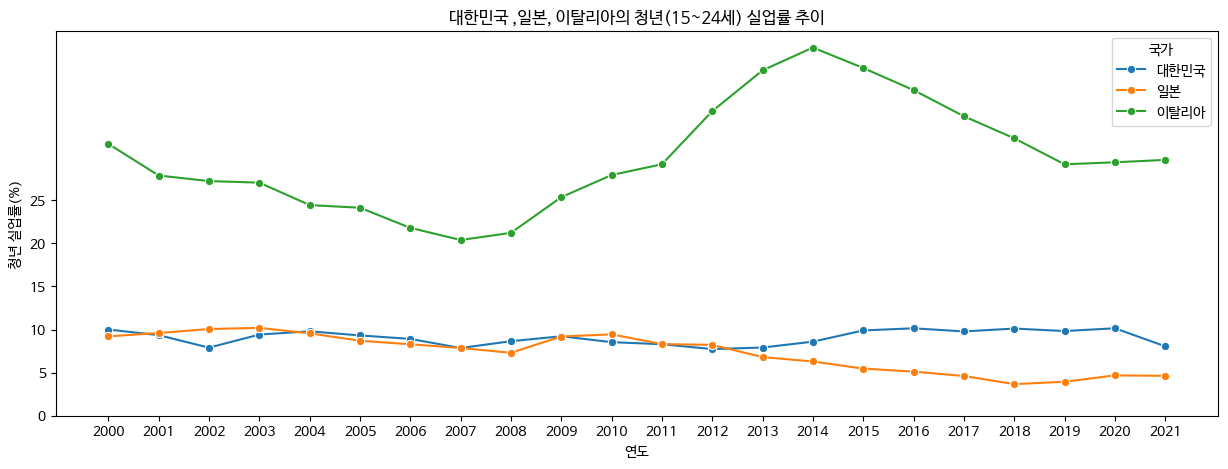

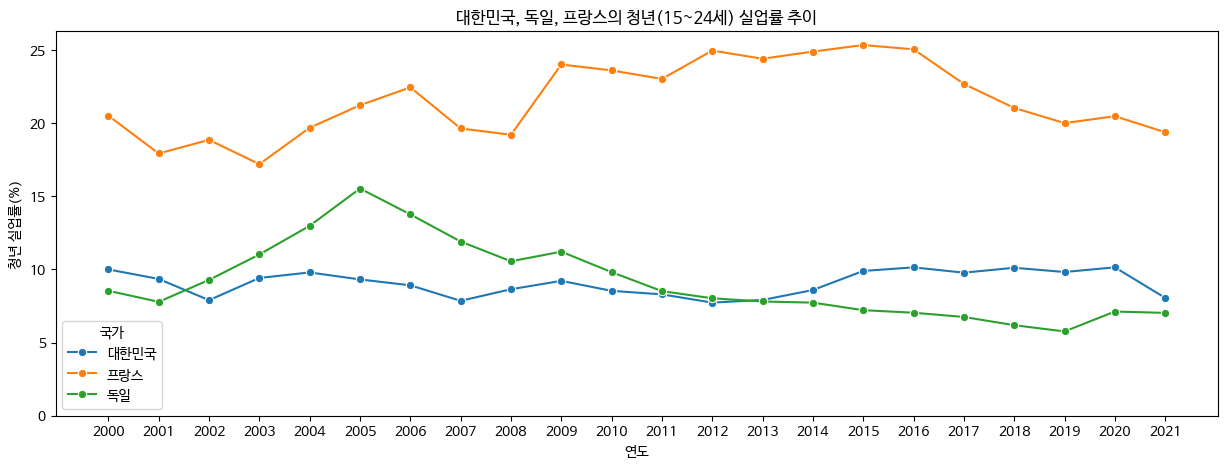

In [14]:
#청년 실업률 시각화
df_unemploy['청년 실업률(%)'] = pd.to_numeric(df_unemploy['청년 실업률(%)'])

df_low_unemploy = df_unemploy[df_unemploy['국가'].isin(['일본','이탈리아','대한민국'])]
df_high_unemploy = df_unemploy[df_unemploy['국가'].isin(['프랑스','독일','대한민국'])]

plt.figure(figsize=(15, 5))
sns.lineplot(x='연도', y='청년 실업률(%)', data=df_low_unemploy, marker='o', hue='국가')
plt.yticks(np.arange(0, 30, 5))
plt.title("대한민국 ,일본, 이탈리아의 청년(15~24세) 실업률 추이")

plt.figure(figsize=(15, 5))
sns.lineplot(x='연도', y='청년 실업률(%)', data=df_high_unemploy, marker='o', hue='국가')
plt.yticks(np.arange(0, 30, 5))
plt.title("대한민국, 독일, 프랑스의 청년(15~24세) 실업률 추이")


**데이터 수집**<br>
4.연간 GDP 데이터 수집

In [15]:
 #연간 GDP

params = {
    "apiKey": "OWVmNjBiOTgzZjhiNzYyNjYwNjU0YWUxYTNkYTAzMWM=",
    "itmId": "T2+",#데이터 분류 코드
    "objL1": "ALL",
    "format": "json",
    "jsonVD": "Y",
    "prdSe": "Y",
    "newEstPrdCnt": "10",
    "orgId": "101", #데이터 제공 조직 ID (통계청, IMF)
    "tblId": "DT_2WEO002", #조회 테이블 ID (연간 GDP)

}

# API 요청 보내기
response = requests.get(url, params=params)

#JSON 데이터 파싱
GDP_data = response.json()
#print(GDP_data)

**데이터 가공/정제**<br>
- df_All_GDP
-- 2023년의 세계 GDP 데이터를 높은 순으로정렬하기 위해 내림차순정렬로 상위 50개 국가 추출 후 저장
-- 시각화할 때 GDP가 높은 국가부터 나오게 하기 위해 오름차순으로 다시 정렬
- df_select_GDP
-- 대한민국, 일본, 이탈리아, 독일, 프랑스의 GDP데이터

In [16]:
df_All_GDP = pd.DataFrame(GDP_data)#DF로 저장
df_All_GDP = df_All_GDP[['PRD_DE', 'C1_NM', 'DT']]#원하는 데이터만 저장
df_All_GDP = df_All_GDP[df_All_GDP['PRD_DE'] == "2023"] # 2023년도의 데이터 저장
df_All_GDP.columns = ['연도', '국가', 'GDP($ Bilion)']#컬럼 이름변경

#비교국가
df_select_GDP= df_All_GDP[df_All_GDP['국가'].isin(['대한민국', '일본','프랑스','독일', '이탈리아'])]

#상위 50개국만 데이터만 저장
df_All_GDP['GDP($ Bilion)'] = df_All_GDP['GDP($ Bilion)'].astype(float)  #상위 50개 국가 필터링을 위해 데이터를 float로 변경
df_All_GDP = df_All_GDP.sort_values(by="GDP($ Bilion)", ascending=False).head(50)

df_All_GDP = df_All_GDP.sort_values(by="GDP($ Bilion)", ascending=True)#시각화를 위해 오차순으로 정렬
print(df_All_GDP.head())
print(df_select_GDP)

        연도    국가  GDP($ Bilion)
733   2023    페루        266.912
1109  2023  포르투갈        287.187
929   2023   핀란드        295.618
573   2023    칠레        335.642
321   2023  파키스탄        337.457
       연도    국가 GDP($ Bilion)
3    2023  대한민국      1839.058
187  2023    일본      4219.828
939  2023   프랑스      3052.712
949  2023    독일      4527.009
999  2023  이탈리아      2301.603


**데이터 시각화**<br>
4-1.GDP데이터 시각화
- 대한민국, 일본, 이탈리아, 독일, 프랑스의 2023년 GDP를 barplot으로 시각화


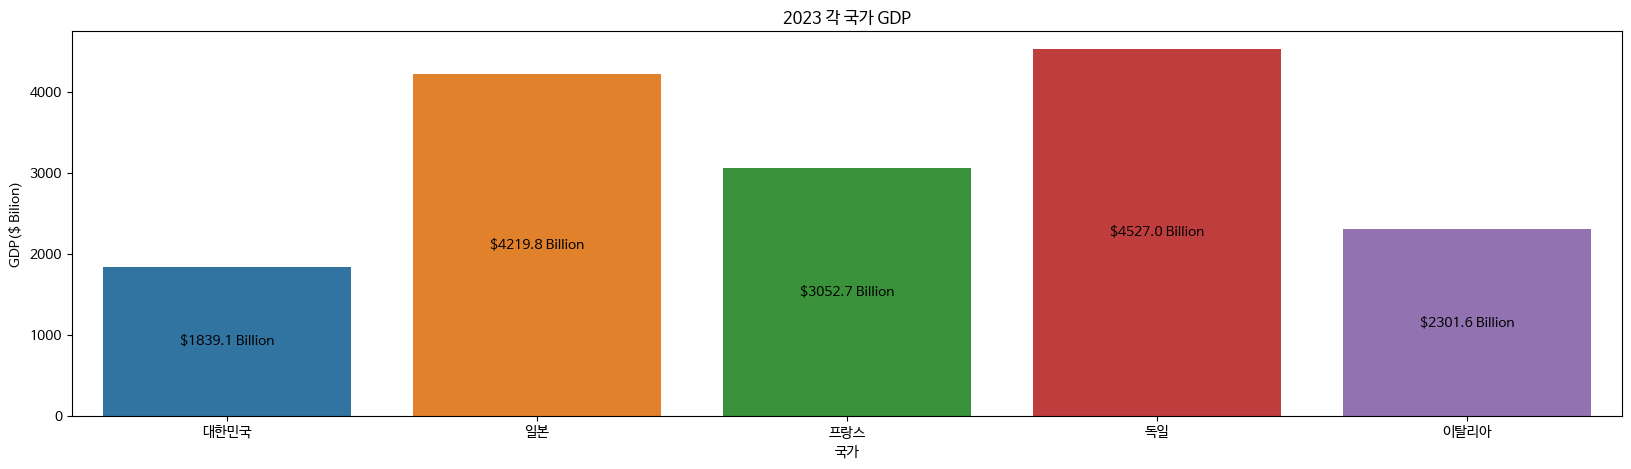

In [17]:
#GDP 시각화
df_select_GDP['GDP($ Bilion)'] = pd.to_numeric(df_select_GDP['GDP($ Bilion)'])

plt.figure(figsize=(20, 5))
barplot=sns.barplot(x='국가', y='GDP($ Bilion)', data=df_select_GDP, hue='국가')
plt.title('2023 각 국가 GDP')

#각 그레프의 값 표기
for bars in barplot.containers:
  barplot.bar_label(bars, fmt='$'+'%.1f'+' Billion',label_type='center')

4-2.GDP데이터 시각화
- 상위 50개국가의 GDP를 수평 그래프로 시각화

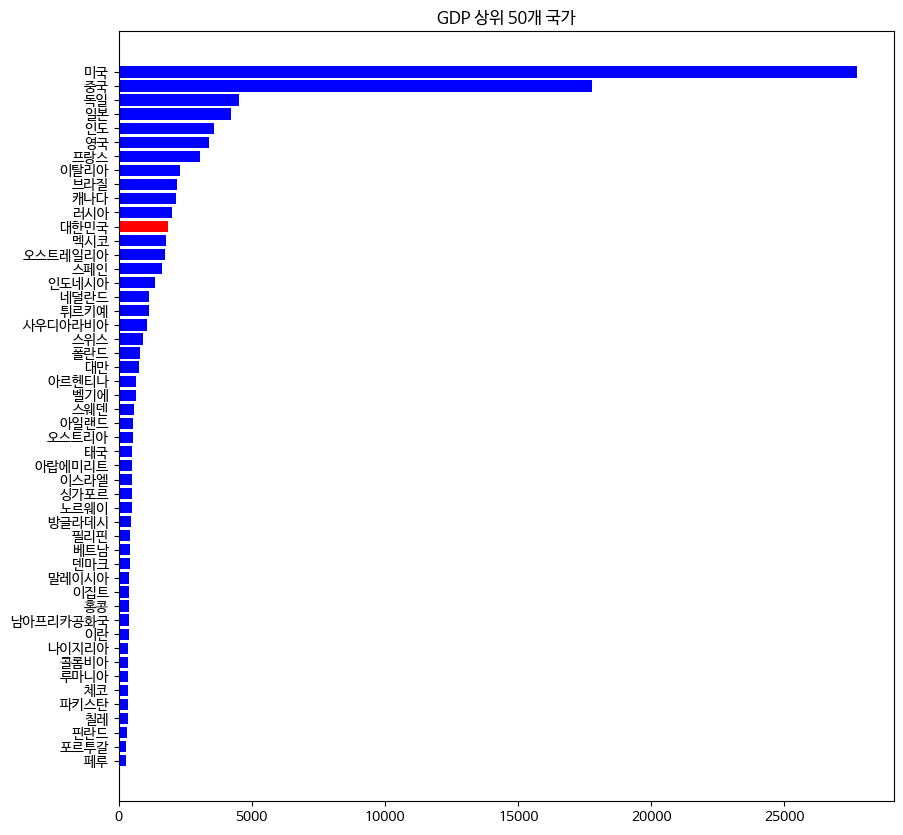

In [18]:
#세계 GDP순위
plt.figure(figsize=(10, 10))
df_All_GDP['GDP($ Bilion)'] = pd.to_numeric(df_All_GDP['GDP($ Bilion)'])

bars = plt.title('GDP 상위 50개 국가')
bars = plt.barh(
    df_All_GDP['국가'],
    df_All_GDP['GDP($ Bilion)'],
    color=['blue' if country != '대한민국' else 'red' for country in df_All_GDP['국가']]
)

**데이터 수집**<br>
5.근무시간당 GDP 데이터 수집


In [19]:
#GDP(근무시간당 생산량)
params = {
    "apiKey": "OWVmNjBiOTgzZjhiNzYyNjYwNjU0YWUxYTNkYTAzMWM=",
    "itmId": "T001+",#데이터분류 코드
    "objL1": "ALL",
    "format": "json",
    "jsonVD": "Y",
    "prdSe": "Y",
    "newEstPrdCnt": "3",
    "orgId": "101", #데이터 제공 조직 ID (통계청, 국제노동기구)
    "tblId": "DT_2ILOPRO003", #조회 테이블 ID (근무시간당 생산량)

}

# API 요청 보내기
response = requests.get(url, params=params)

#JSON 데이터 파싱 및 데이터 확인
workhour_gdp_data = response.json()
#print(workhour_gdp_data)

**데이터 가공/정제**<br>
5.근무시간당 GDP데이터 가공/정제
- 바로 DataFrame으로 저장시 scalar값 에러 발생
-- ValueError: If using all scalar values, you must pass an index
- 리스트에 데이터를 저장했다가 DF로 저장
-df_workhour_gdp
-- 대한민국, 일본, 이탈리아, 독일, 프랑스의 데이터 저장
- df_All_workgour_gdp
-- 전 세계 국가의 근무시간당 GDP 데이터 저장
-- 근무시간당 생산량이 상위 50위인 국가를 저장하기위해 수치데이터로 변경 후 내림차순을 통해 정렬 후 head()를 통해 50개 국가만 추출 후 장
-- 시각화시에 근무시간당 생산량이 높은 국가가 위에 뜨도록 하기위해 다시 오름차순으로 정렬

In [20]:
# 단일 값(스칼라 값) 에러로인해 리스트로 저장 후 DF로 저장
data_list = []
for item in workhour_gdp_data:
  data_list.append({
  "연도": item.get("PRD_DE"),
  "국가": item.get("C1_NM"),
  "근무시간당 생산량": item.get("DT")
})

df_workhour_gdp = pd.DataFrame(data_list)

#원하는 데이터만 추출
df_workhour_gdp = df_workhour_gdp[df_workhour_gdp['연도'] == "2023"]
df_workhour_gdp = df_workhour_gdp[df_workhour_gdp['국가'].isin(['대한민국', '일본','프랑스','독일','이탈리아'])]
df_workhour_gdp.columns = ['연도', '국가','근무시간당 생산량($)']

#전체 데이터 중 2023년도 데이터
df_All_workhour_gdp = pd.DataFrame(data_list)
df_All_workhour_gdp = df_All_workhour_gdp[df_All_workhour_gdp['연도'] == "2023"]
df_All_workhour_gdp.columns = ['연도', '국가', '근무시간당 생산량($)']

#상위 50개국만 데이터만 저장
df_All_workhour_gdp['근무시간당 생산량($)'] = df_All_workhour_gdp['근무시간당 생산량($)'].astype(float)
df_All_workhour_gdp = df_All_workhour_gdp.sort_values(by="근무시간당 생산량($)", ascending=False).head(50)
df_All_workhour_gdp = df_All_workhour_gdp.sort_values(by="근무시간당 생산량($)", ascending=True)
print(df_workhour_gdp)
print(df_All_workhour_gdp.head())

       연도    국가 근무시간당 생산량($)
4    2023  대한민국        41.98
61   2023    일본        41.65
290  2023   프랑스        67.92
293  2023    독일        68.14
308  2023  이탈리아        61.73
       연도         국가  근무시간당 생산량($)
539  2023  프랑스령폴리네시아         39.28
137  2023       튀르키예         40.36
311  2023       라트비아         40.70
61   2023         일본         41.65
143  2023     아랍에미리트         41.72


**데이터 시각화**<br>
5-1.근무시간당 GDP 데이터 시각화
- 대한민국, 일본, 이탈리아, 독일, 프랑스의 데이터를 barplot으로 시각화

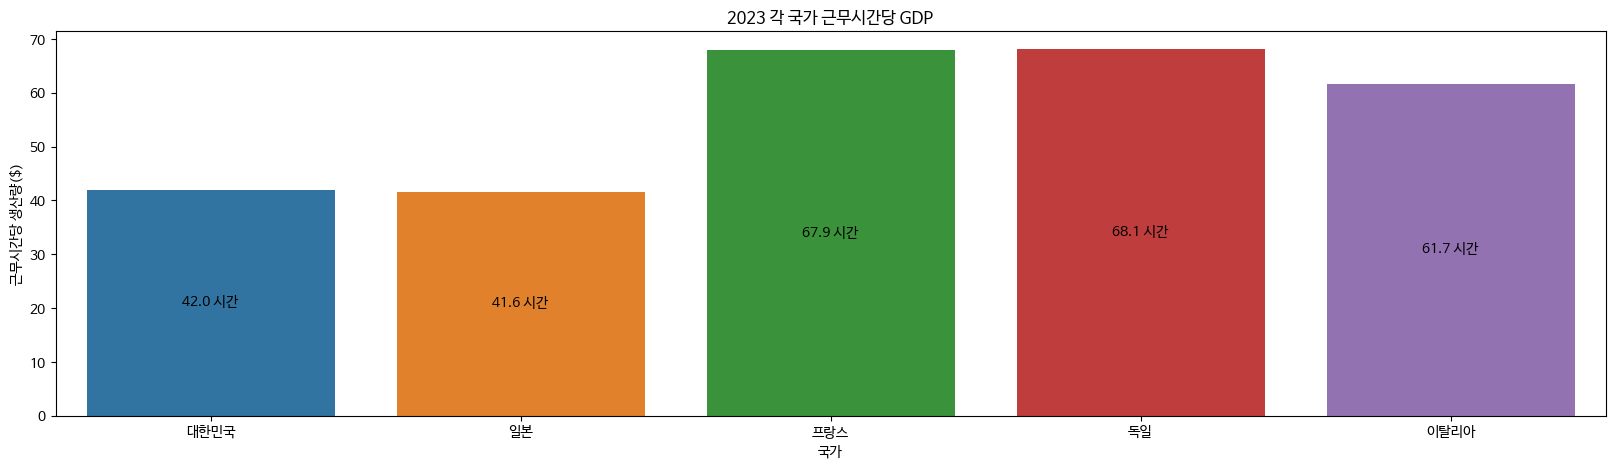

In [21]:
#근무시간당 GDP 시각화
df_workhour_gdp['근무시간당 생산량($)'] = pd.to_numeric(df_workhour_gdp['근무시간당 생산량($)'])#시각화를 위해 수치 데이터로 변환

plt.figure(figsize=(20, 5))
barplot=sns.barplot(x='국가', y='근무시간당 생산량($)', data=df_workhour_gdp, hue='국가')
plt.title('2023 각 국가 근무시간당 GDP')

#그래프 값 표기
for bars in barplot.containers:
  barplot.bar_label(bars, fmt='%.1f'+' 시간',label_type='center')

5-2.근무시간당 GDP 데이터 시각화
- 전 세계 국가 중 근무시간당 GDP의 상위 50개 국가
- 대한민국 구분 쉽게하기 위해 다른 색을 이용해 표기

<BarContainer object of 50 artists>

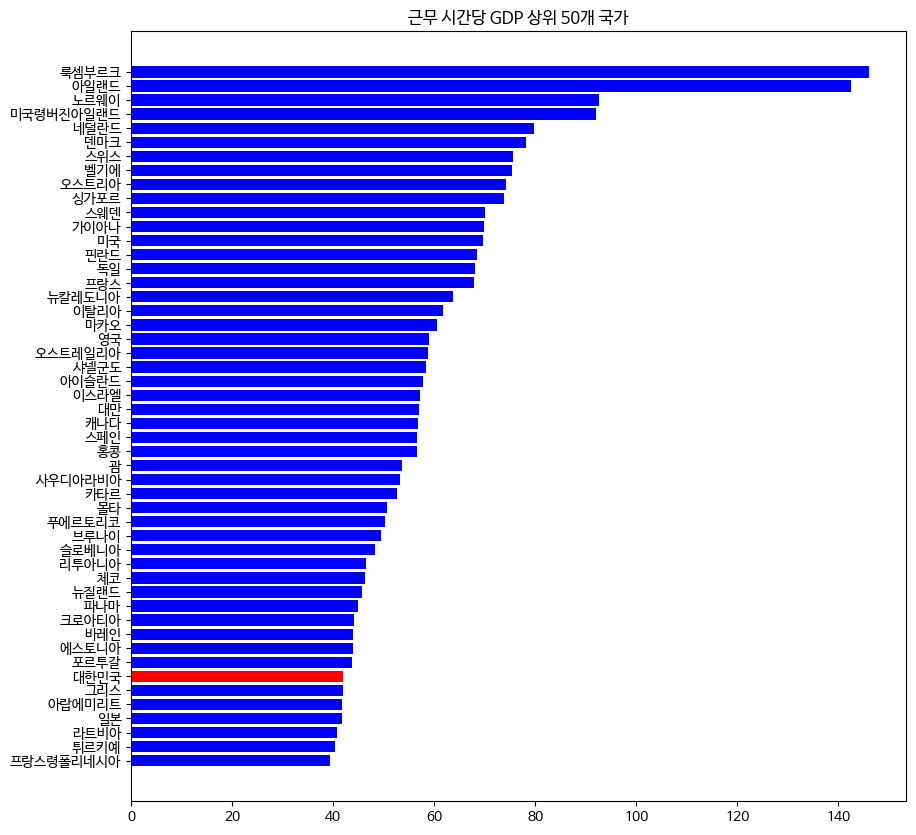

In [22]:
#시간당 GDP 시각화
df_All_workhour_gdp['근무시간당 생산량($)'] = pd.to_numeric(df_All_workhour_gdp['근무시간당 생산량($)'])
plt.figure(figsize=(10, 10))

plt.title('근무 시간당 GDP 상위 50개 국가')
plt.barh(
    df_All_workhour_gdp['국가'],
    df_All_workhour_gdp['근무시간당 생산량($)'],
    color=['blue' if country != '대한민국' else 'red' for country in df_All_workhour_gdp['국가']]#대한민국만 빨간색 그래프 지정
)

**데이터 수집**<br>
6.근로시간 데이터 수집

In [23]:
#근로자당 연 평균 실제 근로시간

params = {
    "apiKey": "OWVmNjBiOTgzZjhiNzYyNjYwNjU0YWUxYTNkYTAzMWM=",
    "itmId": "T2+", #데이터 분류 코드
    "objL1": "ALL",
    "format": "json",
    "jsonVD": "Y",
    "prdSe": "Y",
    "newEstPrdCnt": "30",
    "orgId": "101", #데이터 제공 조직 ID (통계청, OECD)
    "tblId": "DT_2BR20", #조회 테이블 ID (연간 근로시간)

}

# API 요청 보내기
response = requests.get(url, params=params)

#JSON 데이터 파싱 및 데이터 확인
worked_hour_data = response.json()
#print(worked_hour_data)

**데이터 가공/정제**<br>
6.근로시간데이터 가공/정제
- df_worked_hour
-- 대한민극, 일본, 이탈리아, 독일, 프랑스의 2000년대 근로시간 데이터 저장
- df_2022_worhour
-- 전 세계의 2022년 근로시간 데이터 저장
-- 근로시간이 상위 50위인 국가를 저장하기위해 수치데이터로 변경 후 내림차순을 통해 정렬 후 head()를 통해 50개 국가만 추출 후 저장
-- 시각화시에 근로시간이 생산량이 높은 국가가 위에 뜨도록 하기위해 다시 오름차순으로 정렬

In [24]:
#대한민국, 일본, 프랑스의 출산율 데이터만 DF로 저장
df_worked_hour = pd.DataFrame(worked_hour_data)
df_worked_hour = df_worked_hour[['PRD_DE', 'C1_NM', 'DT']]
df_worked_hour= df_worked_hour[df_worked_hour['C1_NM'].isin(['대한민국', '일본','프랑스','독일','이탈리아'])]
df_worked_hour = df_worked_hour[df_worked_hour['PRD_DE'].isin([str(year) for year in range(2008, 2023)])]#2008~ 2022까지의 데이터만 저장 (2029년도 까지 데이터 제공)

df_worked_hour.columns = ['연도', '국가', '연 평균 근로시간']# 컬럼이름 변경

#수치 데이터로 변환
df_worked_hour['연 평균 근로시간'] = df_worked_hour['연 평균 근로시간'].astype(float).round()

#전체 데이터 중 2022년도 데이터
df_2022_workhour = pd.DataFrame(worked_hour_data)
df_2022_workhour = df_2022_workhour[['PRD_DE', 'C1_NM', 'DT']]
df_2022_workhour= df_2022_workhour[df_2022_workhour['PRD_DE'] == "2022"]
df_2022_workhour.columns = ['연도', '국가', '연 평균 근로시간']

#상위 50개국만 데이터만 저장
df_2022_workhour['연 평균 근로시간'] = df_2022_workhour['연 평균 근로시간'].astype(float)  #상위 50개 국가 필터링을 위해 데이터를 float로 변경
df_2022_workhour = df_2022_workhour.sort_values(by="연 평균 근로시간", ascending=False).head(50)
df_2022_workhour = df_2022_workhour.sort_values(by="연 평균 근로시간", ascending=True)

print(df_worked_hour.head())
print(df_2022_workhour.head())

       연도   국가  연 평균 근로시간
334  2008  프랑스     1543.0
335  2009  프랑스     1531.0
336  2010  프랑스     1540.0
337  2011  프랑스     1546.0
338  2012  프랑스     1541.0
        연도    국가   연 평균 근로시간
378   2022    독일  1340.86197
265   2022   덴마크  1371.60610
837   2022  노르웨이  1424.58291
777   2022  네덜란드  1427.01567
1041  2022   스웨덴  1440.45912


**데이터 시각화**<br>
6-1.근로시간 데이터 시각화
- 서브플롯을 사용해 2000년대 근로시간 추이를 lineplot으로 2022년 근로시간을 barplot으로 시각화

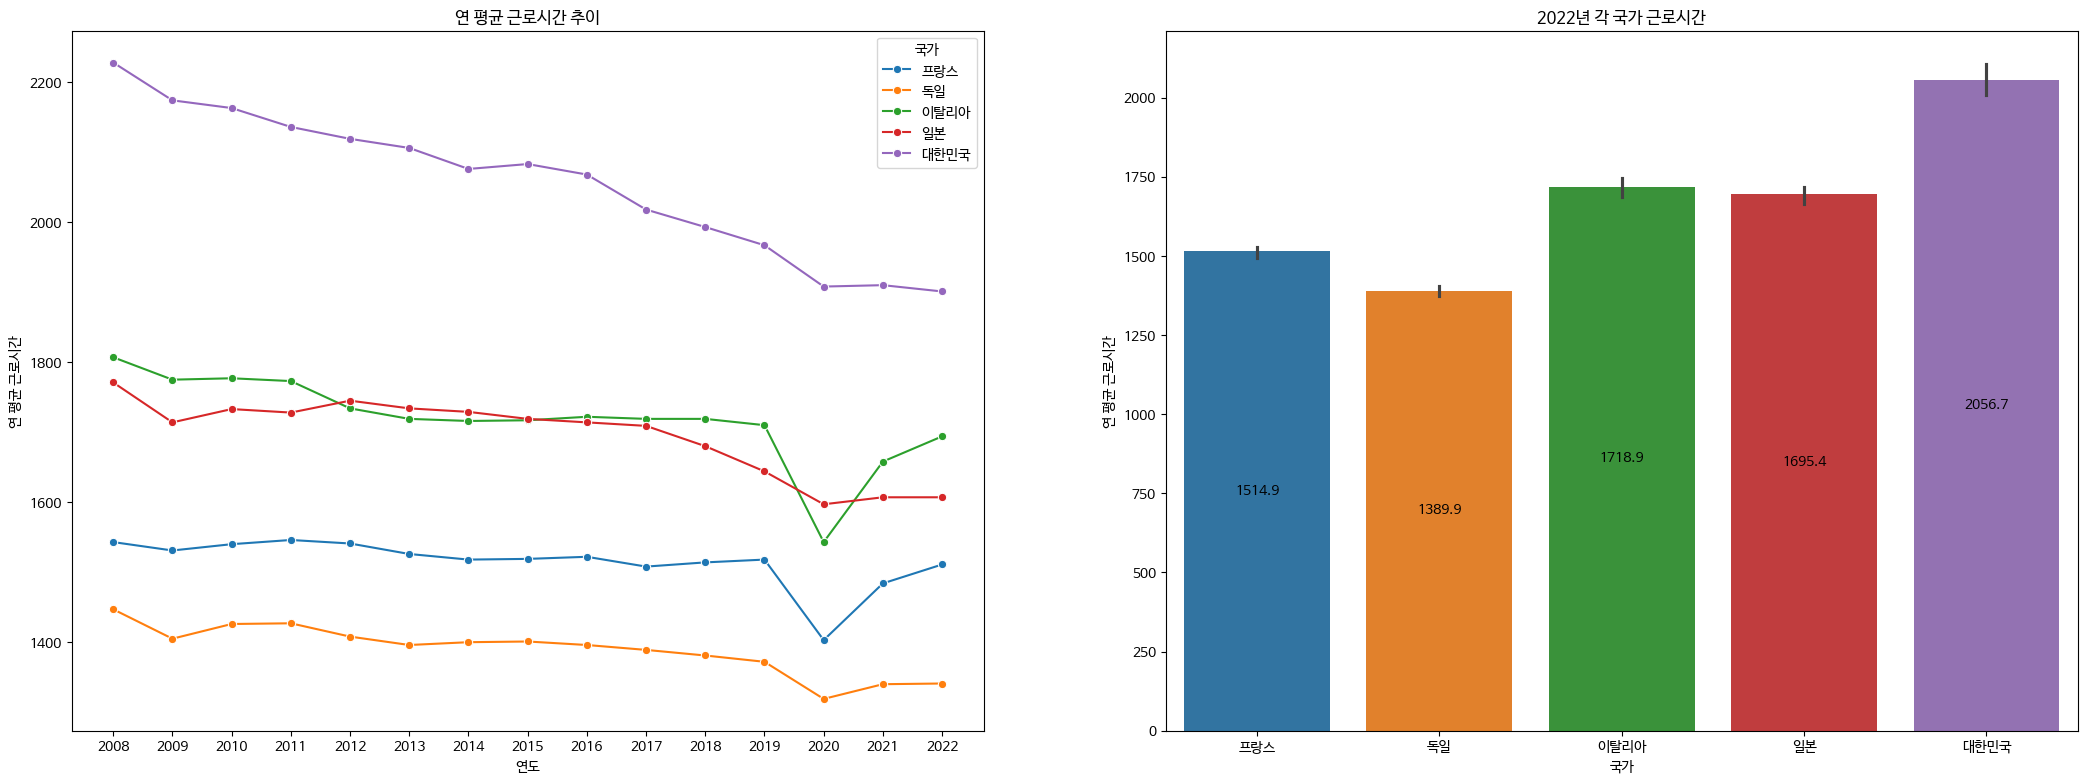

In [25]:
worked_hour_sub_plot = plt.figure(figsize=(40, 20))

ax1=worked_hour_sub_plot.add_subplot(2,3,1)
ax2=worked_hour_sub_plot.add_subplot(2,3,2)

#연도별 근로시간 추이 그래프
ax1.set_title('연 평균 근로시간 추이')
sns.lineplot(x='연도', y='연 평균 근로시간', data=df_worked_hour, hue='국가', marker='o' ,ax = ax1)

#2022년도 근로시간
ax2.set_title('2022년 각 국가 근로시간')
barplot = sns.barplot(x='국가', y='연 평균 근로시간', data=df_worked_hour, hue='국가', ax = ax2)
for bars in barplot.containers:
  barplot.bar_label(bars, fmt='%.1f',label_type='center')


6-2.근로시간 데이터 시각화
- 2022년도 데이터를 수평그래프로 시각화

<BarContainer object of 36 artists>

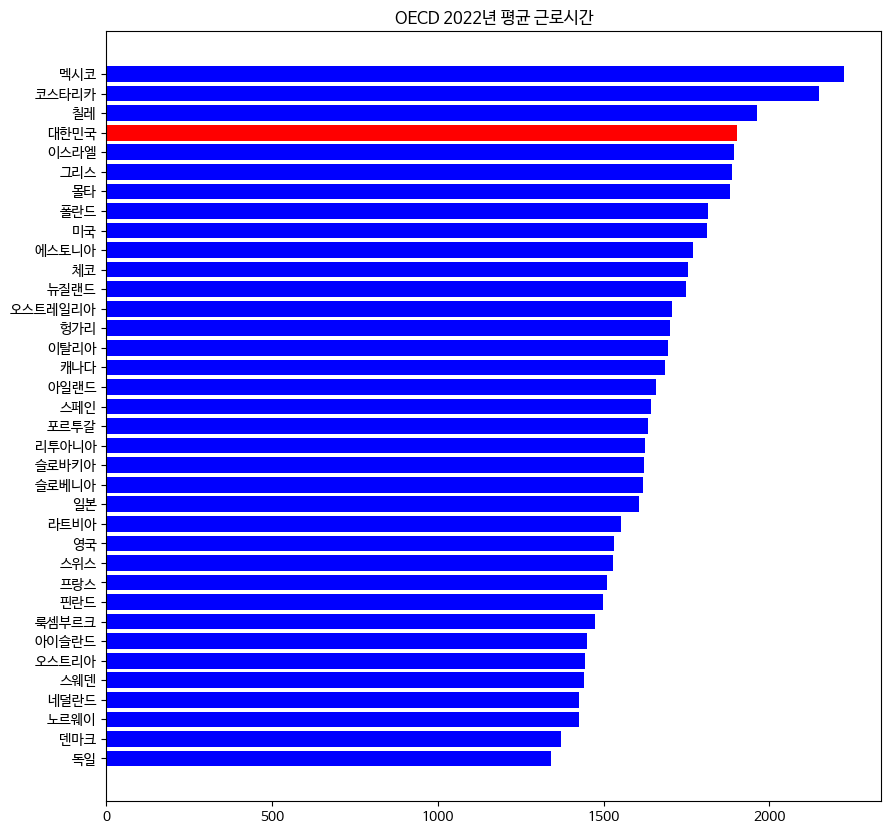

In [26]:
#OECD 2022 평균 근로시간

df_2022_workhour['연 평균 근로시간'] = pd.to_numeric(df_2022_workhour['연 평균 근로시간'])
plt.figure(figsize=(10, 10))

plt.title('OECD 2022년 평균 근로시간')
plt.barh(
    df_2022_workhour['국가'],
    df_2022_workhour['연 평균 근로시간'],
    color=['blue' if country != '대한민국' else 'red' for country in df_2022_workhour['국가']]
)

**데이터 수집**<br>
7. 대한민국의 평균 혼인연령 데이터 수집


In [27]:
 #평균 혼인연령

params = {
    "apiKey": "OWVmNjBiOTgzZjhiNzYyNjYwNjU0YWUxYTNkYTAzMWM=",
    "itmId": "T1+", #데이터분류 코드
    "objL1": "000", #데이터분류 코드
    "objL2": "10+", #데이터분류 코드
    "objL3": "ALL",
    "format": "json",
    "jsonVD": "Y",
    "prdSe": "Y",
    "newEstPrdCnt": "15",
    "orgId": "101", #데이터 제공 조직 ID (통계청, 신혼부부통계)
    "tblId": "DT_1NW1005", #조회 테이블 ID  (연간 GDP)

}

# API 요청 보내기
response = requests.get(url, params=params)

# JSON 데이터 파싱 및 데이터 확인
avg_age_data = response.json()
#print(avg_age_data)

**데이터 가공/정제**<br>
7.대한민국의 평균 결혼연령 데이터 가공/정제


In [28]:
#DF저장
df_avg_age = pd.DataFrame(avg_age_data)
df_avg_age= df_avg_age[['PRD_DE', 'C3_NM', 'DT']]
df_avg_age.columns = ['연도', '구분', '나이(세)']

# 시각화를 위해 수치 데이터로 변경
df_avg_age['나이(세)'] = pd.to_numeric(df_avg_age['나이(세)'])

print(df_avg_age.head())

     연도  구분  나이(세)
0  2015  남편   31.8
1  2016  남편   32.0
2  2017  남편   32.1
3  2018  남편   32.3
4  2019  남편   32.5


**데이터 시각화**<br>
7.대한민국 평균 결혼 연령 데이터 시각화
- 남.녀의 평균 결혼연령을 연도별로 시각화
- 범례가 그래프를 가려서 위치조정


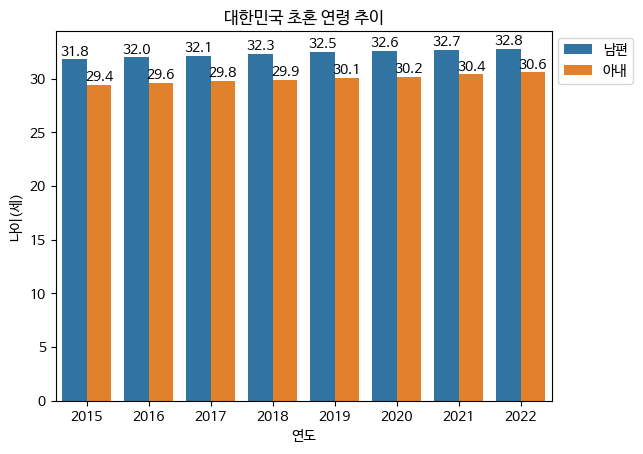

In [29]:
#결혼 연령 시각화
plt.title('대한민국 초혼 연령 추이')
barplot = sns.barplot(data=df_avg_age, x='연도', y='나이(세)', hue='구분')

#그래프 값 표기
for bars in barplot.containers:
  barplot.bar_label(bars, fmt='%.1f')

#위치조정
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

**데이터 수집**<br>
8.대한민국 신혼부부 수 데이터 수집

In [30]:
#연차별 신혼 부부 수
params = {
    "apiKey": "OWVmNjBiOTgzZjhiNzYyNjYwNjU0YWUxYTNkYTAzMWM=",
    "itmId": "T10+", #데이터 분류 코드
    "objL1": "101+102+103+104+105+", #데이터 분류 코드
    "objL2": "00+", #데이터 분류 코드
    "format": "json",
    "jsonVD": "Y",
    "prdSe": "Y",
    "newEstPrdCnt": "15",
    "orgId": "101", #데이터 제공 조직 ID (통계청, 신혼부부통계)
    "tblId": "DT_1NW1003",

}

# API 요청 보내기
response = requests.get(url, params=params)

# JSON 데이터 파싱 데이터 확인
num_newlywed_data = response.json()
#print(num_newlywed_data)

**데이터 가공/정제**<br>
8.대한민국 신혼부부 수데이터 가공/정제

In [31]:
#필요한 데이터 저장
df_num_newlywed = pd.DataFrame(num_newlywed_data)
df_num_newlywed= df_num_newlywed[['PRD_DE', 'C1_NM', 'DT']]
df_num_newlywed.columns = ['연도', '연차', '합계(쌍)']

print(df_num_newlywed.head())

     연도      연차   합계(쌍)
0  2015  혼인 1년차  290766
1  2016  혼인 1년차  278592
2  2017  혼인 1년차  258535
3  2018  혼인 1년차  252785
4  2019  혼인 1년차  236580


**데잍터 시각화**<br>
8.대한민국 신혼부부 수 데이터 시각화
- 각 연도별 연차별 신혼부부수를 나타내기위해 군집형 막대 그래프로 시각화
- 범례가 그래프를 가려서 위치조정

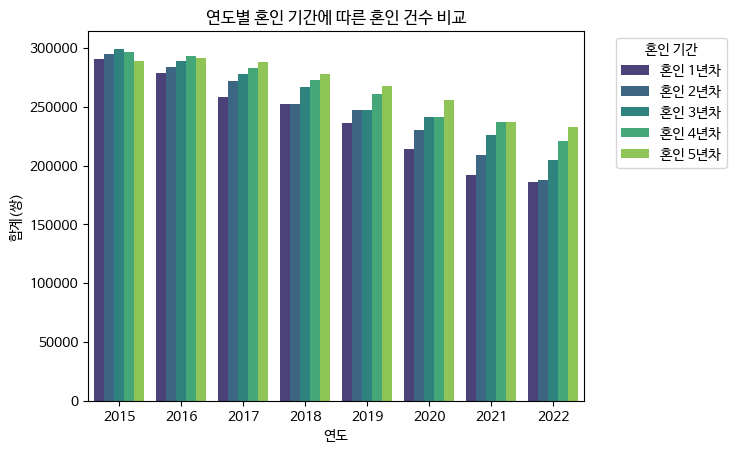

In [32]:
#수치 데이터로 변경
df_num_newlywed['합계(쌍)'] = pd.to_numeric(df_num_newlywed['합계(쌍)'])

# 군집형 막대 그래프
sns.barplot(data=df_num_newlywed, x='연도', y='합계(쌍)', hue='연차', palette='viridis')

plt.title('연도별 혼인 기간에 따른 혼인 건수 비교')

# 범례 위치 조정
plt.legend(title='혼인 기간', bbox_to_anchor=(1.05, 1), loc='upper left')

**데이터 수집**<br>
9.대한민국 조혼인율 데이터 수집
- 조혼인율(인구 1000명당 혼인건수)

In [33]:
#조혼인율(인구 1000명당 혼인건수)
params = {
    "apiKey": "OWVmNjBiOTgzZjhiNzYyNjYwNjU0YWUxYTNkYTAzMWM=",
    "itmId": "T1+",
    "objL1": "42+",
    "format": "json",
    "jsonVD": "Y",
    "prdSe": "Y",
    "newEstPrdCnt": "23",
    "orgId": "101", #데이터 제공 조직 ID (통계청, 인구동향조사)
    "tblId": "INH_1B8000F_03",

}

# API 요청 보내기
response = requests.get(url, params=params)

# 응답 데이터 확인 및 JSON 데이터 파싱
num_newlywed_rate_data = response.json()
#print(num_newlywed_rate_data)

**데이터 가공/정제**<br>
9.조혼인율 데이터 가공/정제

In [34]:
df_num_newlywed_rate = pd.DataFrame(num_newlywed_rate_data)
df_num_newlywed_rate = df_num_newlywed_rate[['PRD_DE', 'C1_NM', 'DT']]
df_num_newlywed_rate.columns = ['연도', '연차', '조혼인율(%)']

print(df_num_newlywed_rate.head())

     연도         연차 조혼인율(%)
0  2001  조혼인율(천명당)     6.7
1  2002  조혼인율(천명당)     6.3
2  2003  조혼인율(천명당)     6.3
3  2004  조혼인율(천명당)     6.4
4  2005  조혼인율(천명당)     6.5


**데이터 시각화**<br>
9.조혼인율 데이터 시각화
- 2000년대 조혼인율 추이를 시각화하기 위해 lineplot사용

Text(0.5, 1.0, '2000년대의 대한민국의 조혼인율 추이')

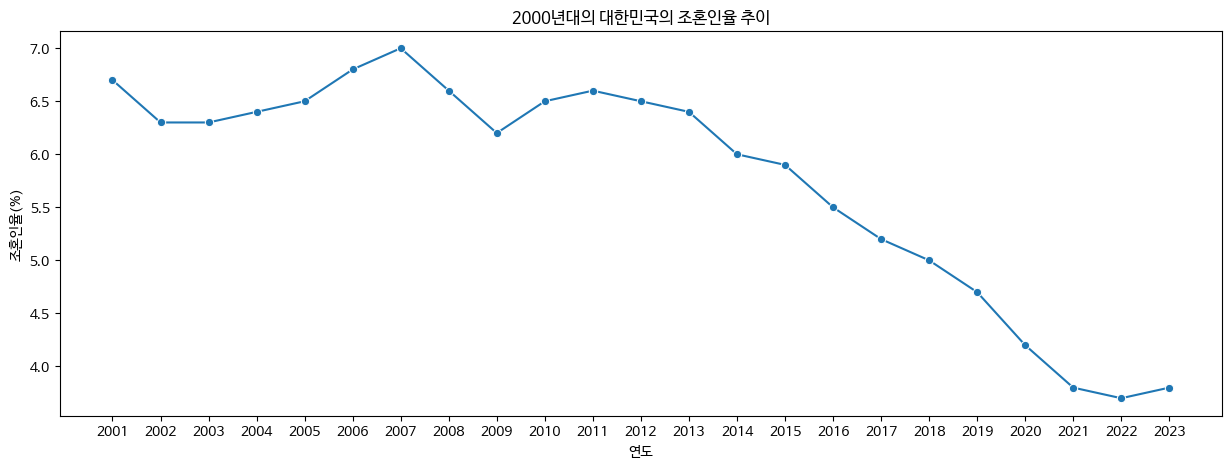

In [35]:
#조혼인율 시각화
df_num_newlywed_rate['조혼인율(%)'] = pd.to_numeric(df_num_newlywed_rate['조혼인율(%)'])

plt.figure(figsize=(15, 5))
sns.lineplot(x='연도', y='조혼인율(%)', data=df_num_newlywed_rate, marker='o')
plt.title('2000년대의 대한민국의 조혼인율 추이')

**데이터 수집**<br>
10.미혼남녀(19~49세)의 결혼에 관한 인식조사<br>
- marriage_recog_data
-- 미혼남녀(19~49세)의 결혼 필요성 인식조사
- marriage_satisfy_data
-- 미혼남녀(19~49세)의 기혼과 미혼에 관한 행복도 조사


In [36]:
#미혼남녀(19~49세)결혼인식(필요성)
params = {
    "apiKey": "OWVmNjBiOTgzZjhiNzYyNjYwNjU0YWUxYTNkYTAzMWM=",
    "itmId": "T001",
    "objL1": "A01+",
    "objL2": "B01+B02+B03+B04+",
    "format": "json",
    "jsonVD": "Y",
    "prdSe": "Y",
    "newEstPrdCnt": "3",
    "orgId": "331", #데이터 제공 조직 ID (통계청, 한국보건 사회 연구원)
    "tblId": "DT_331001_2021CG012",

}

# API 요청 보내기
response = requests.get(url, params=params)

# 응답 데이터 확인 및 JSON 데이터 파싱
marriage_recog_data = response.json()
#print(marriage_recog_data)


#기혼과 미혼의 행복 정도
params = {
    "apiKey": "OWVmNjBiOTgzZjhiNzYyNjYwNjU0YWUxYTNkYTAzMWM=",
    "itmId": "T001",
    "objL1": "A01+",
    "objL2": "B01+B02+B03+B04+",
    "format": "json",
    "jsonVD": "Y",
    "prdSe": "Y",
    "newEstPrdCnt": "3",
    "orgId": "331", #데이터 제공 조직 ID (통계청, 한국보건 사회 연구원)
    "tblId": "DT_331001_2021CG013",
}
# API 요청 보내기
response = requests.get(url, params=params)

# 응답 데이터 확인 및 JSON 데이터 파싱
marriage_satisfy_data = response.json()
#print(marriage_satisfy_data)

**데이터 가공/정제**<br>
10.미혼남녀의(19~49세) 결혼에 관한 인식조사 데이터 가공/정제
- 바로 DataFrame으로 저장시 scalar값 에러 발생
-- ValueError: If using all scalar values, you must pass an index
- 리스트에 데이터를 저장했다가 DF로 저장
- df_marriage_recog
-- 결혼 필요성 인식조사
- df_marriage_satisfy
-- 기혼과 미혼의 행복도 인식 조사

In [37]:
# 단일 값(스칼라 값) 에러로인해 리스트로 저장 후 DF로 저장
data_list = []
for item in marriage_recog_data:
  data_list.append({
  "연도": item.get("PRD_DE"),
  "응답": item.get("C2_NM"),
  "응답률(%)": item.get("DT")
})

df_marriage_recog = pd.DataFrame(marriage_recog_data)
df_marriage_recog = df_marriage_recog[['PRD_DE', 'C2_NM', 'DT']]
df_marriage_recog.columns = ['연도', '응답', '응답률(%)']

print(df_marriage_recog)

# 단일 값(스칼라 값) 에러로인해 리스트로 저장 후 DF로 저장
data_list = []
for item in marriage_satisfy_data:
  data_list.append({
  "연도": item.get("PRD_DE"),
  "응답": item.get("C2_NM"),
  "응답률(%)": item.get("DT")
})

df_marriage_satisfy = pd.DataFrame(marriage_satisfy_data)
df_marriage_satisfy = df_marriage_satisfy[['PRD_DE','C2_NM', 'DT']]
df_marriage_satisfy.columns = ['연도', '응답', '응답률(%)']

print(df_marriage_satisfy)

     연도               응답 응답률(%)
0  2021        반드시 해야 한다      6
1  2021         하는 편이 좋다   30.6
2  2021  해도 좋고 하지 않아도 좋다   51.7
3  2021       하지 않는 게 낫다    7.9
     연도         응답 응답률(%)
0  2021  전혀 동의 안 함   17.1
1  2021  별로 동의 안 함   47.5
2  2021     약간 동의함   29.9
3  2021     매우 동의함    5.5


**데이터 시각화**<br>
10.미혼남녀의(19~49세) 결혼에 관한 인식조사 데이터 시각화
- 인식조사의 답변률을 쉽게 확인하기 위해 파이차트활용
- 두 개의 차트를 한 눈에 보기 쉽게 서브플롯 사용

([<matplotlib.patches.Wedge at 0x7d3619a77a30>,
 [Text(-0.5629173114515006, 0.945052432655572, '전혀 동의 안 함'),
  Text(-0.5981365262164293, -0.9231645010537086, '별로 동의 안 함'),
  Text(1.0553537281010803, 0.3102072026616263, '약간 동의함'),
  Text(0.18912206002071744, 1.0836202500938787, '매우 동의함')],
 [Text(-0.307045806246273, 0.5154831450848575, '17.1%'),
  Text(-0.32625628702714327, -0.5035442733020229, '47.5%'),
  Text(0.5756474880551347, 0.16920392872452342, '29.9%'),
  Text(0.10315748728402768, 0.5910655909602974, '5.5%')])

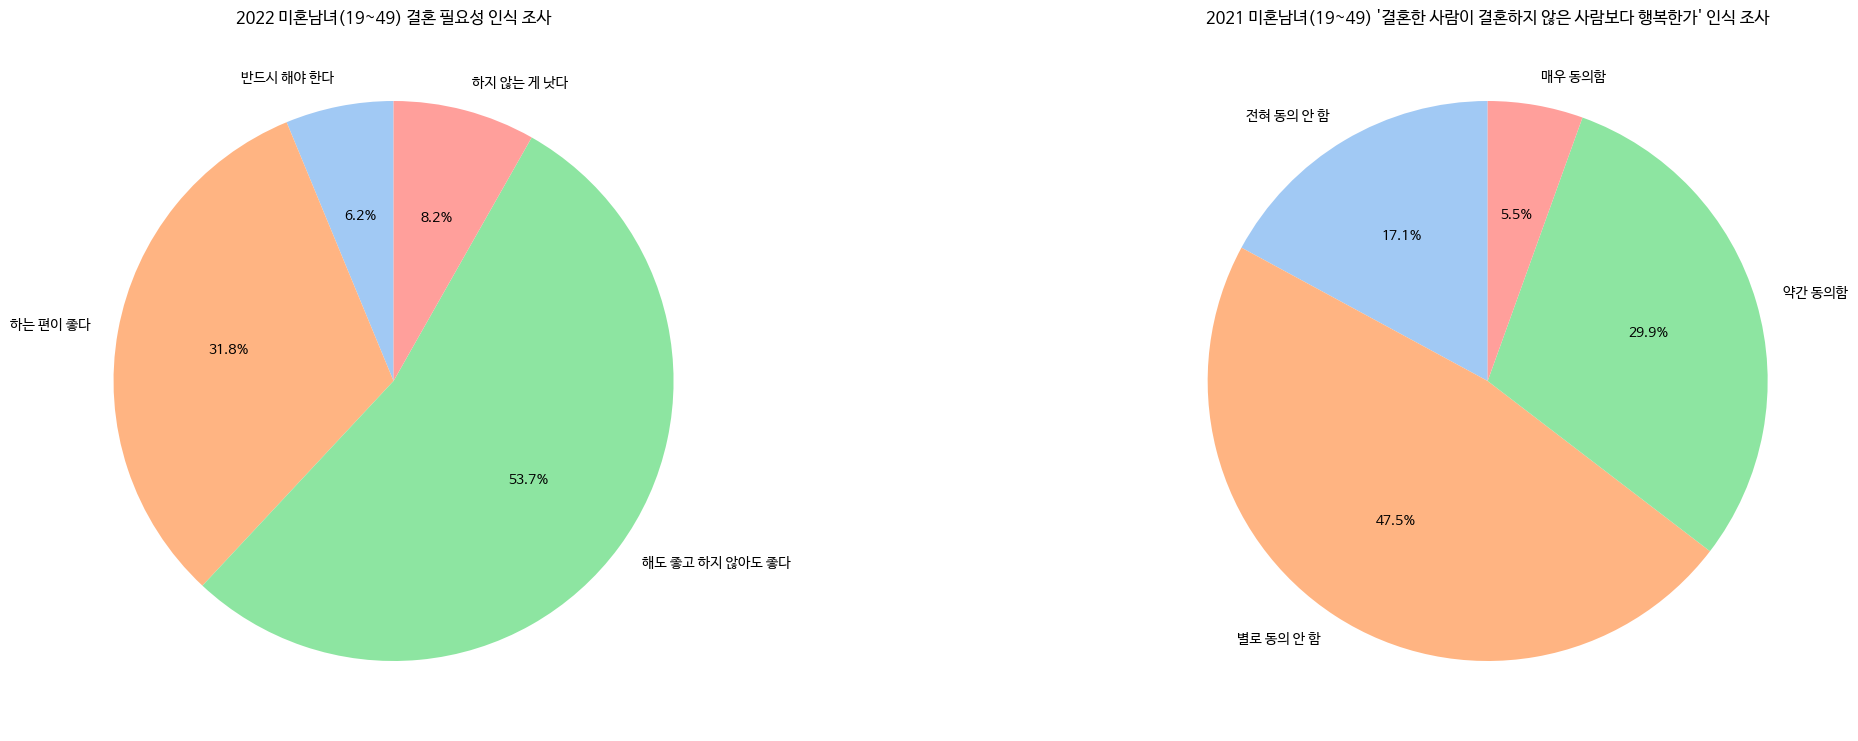

In [38]:
#결혼에 관한 인식조사 시각화
df_marriage_recog['응답률(%)'] = pd.to_numeric(df_marriage_recog['응답률(%)'])
df_marriage_satisfy['응답률(%)'] = pd.to_numeric(df_marriage_satisfy['응답률(%)'])


worked_hour_sub_plot = plt.figure(figsize=(40, 20))

ax1=worked_hour_sub_plot.add_subplot(2,3,1)
ax2=worked_hour_sub_plot.add_subplot(2,3,2)

#파이차트 시각화
ax1.set_title('2022 미혼남녀(19~49) 결혼 필요성 인식 조사')
ax1.pie(
    df_marriage_recog["응답률(%)"],
    labels=df_marriage_recog["응답"],
    autopct="%.1f%%",
    colors=sns.color_palette("pastel"),
    startangle=90
)

ax2.set_title("2021 미혼남녀(19~49) '결혼한 사람이 결혼하지 않은 사람보다 행복한가' 인식 조사")
ax2.pie(
    df_marriage_satisfy["응답률(%)"],
    labels=df_marriage_satisfy["응답"],
    autopct="%.1f%%",
    colors=sns.color_palette("pastel"),
    startangle=90
)



**데이터 수집**<br>
11.신혼부부의 연차별 평균 출생아 수 데이터 수집


In [39]:
#신혼부부 평균 출생아 수
params = {
    "apiKey": "OWVmNjBiOTgzZjhiNzYyNjYwNjU0YWUxYTNkYTAzMWM=",
    "itmId": "T3+",
    "objL1": "101+102+103+104+105+",
    "format": "json",
    "jsonVD": "Y",
    "prdSe": "Y",
    "newEstPrdCnt": "1",
    "orgId": "101", #데이터 제공 조직 ID (통계청, 신혼부부 통계)
    "tblId": "DT_1NW1020",

}

# API 요청 보내기
response = requests.get(url, params=params)

# 응답 데이터 확인 및 JSON 데이터 파싱
newlymed_birth_rate_data = response.json()
#print(newlymed_birth_rate_data)

**데이터 가공/정제**<br>
11.신혼부부 연차별 평균 출생아수 데이터 가공/정제

In [40]:
df_newly_birth_rate = pd.DataFrame(newlymed_birth_rate_data)
df_newly_birth_rate= df_newly_birth_rate[['PRD_DE','C1_NM', 'DT']]
df_newly_birth_rate.columns = ['연도','연차', '평균 출생아 수']

print(df_newly_birth_rate)

     연도      연차 평균 출생아 수
0  2022  혼인 1년차     0.43
1  2022  혼인 2년차      0.6
2  2022  혼인 3년차     0.77
3  2022  혼인 4년차     0.94
4  2022  혼인 5년차     1.09


**데이터 시각화**<br>
11.신혼부부 연차별 평균 출생아 수 데이터 시각화

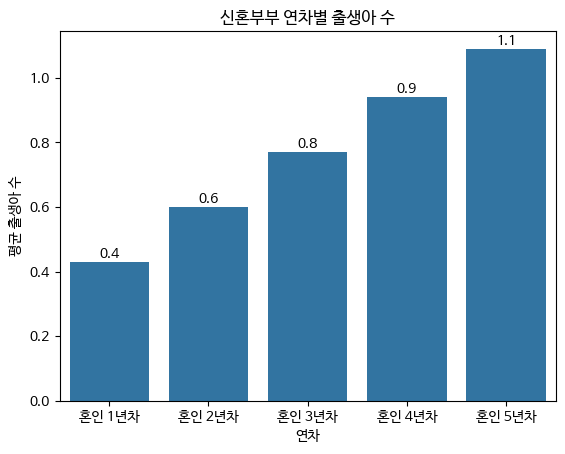

In [41]:
#5년차까지의 신혼부부 평균 출생아 수
df_newly_birth_rate['평균 출생아 수'] = pd.to_numeric(df_newly_birth_rate['평균 출생아 수'])

plt.title('신혼부부 연차별 출생아 수')
barplot = sns.barplot(data=df_newly_birth_rate, x='연차', y='평균 출생아 수')

#그래프 값 표시
for bars in barplot.containers:
  barplot.bar_label(bars, fmt='%.1f')

**데이터 수집**
12.기혼여성의 자녀에 관한 인식조사 데이터 수집
- need_children_data
-- 기혼여성의 자녀 필요성에 관한 인식조사 데이터
- num_children_data
-- 기혼여성의 이상적인 자녀 수에 대한 인식조사 데이터

In [42]:
#기혼여성의 자녀 필요성
params = {
    "apiKey": "OWVmNjBiOTgzZjhiNzYyNjYwNjU0YWUxYTNkYTAzMWM=",
    "itmId": "T001++",
    "objL1": "A01+",
    "objL2": "B01+B02+B03+B04+",
    "format": "json",
    "jsonVD": "Y",
    "prdSe": "Y",
    "newEstPrdCnt": "1",
    "orgId": "331", #데이터 제공 조직 ID (통계청, 신혼부부 통계)
    "tblId": "DT_331001_2021BI029",

}

# API 요청 보내기
response = requests.get(url, params=params)

# 응답 데이터 확인 및 JSON 데이터 파싱
need_children_data = response.json()

#print(need_children_data)

#기혼여성의 이상 자녀수
params = {
    "apiKey": "OWVmNjBiOTgzZjhiNzYyNjYwNjU0YWUxYTNkYTAzMWM=",
    "itmId": "T001++",
    "objL1": "A01+",
    "objL2": "B01+B02+B03+B04+B05+B06+",
    "format": "json",
    "jsonVD": "Y",
    "prdSe": "Y",
    "newEstPrdCnt": "1",
    "orgId": "331", #데이터 제공 조직 ID (통계청, 신혼부부 통계)
    "tblId": "DT_331001_2021BI038",

}

# API 요청 보내기
response = requests.get(url, params=params)

# 응답 데이터 확인 및 JSON 데이터 파싱
num_children_data = response.json()

#print(num_children_data)

**데이터 가공/정제**<br>
12.기혼여성의 자녀에 관한 인식조사 데이터 가공/정제
- 바로 DataFrame으로 저장시 scalar값 에러 발생
-- ValueError: If using all scalar values, you must pass an index
- 리스트에 데이터를 저장했다가 DF로 저장
- df_need_childern
-- 자녀의 필요성 인식조사 데이터
- df_num_childrem
-- 이상적인 자녀 수 인식조사 데이타

In [43]:
data_list = []
for item in need_children_data:
  data_list.append({
  "연도": item.get("PRD_DE"),
  "응답": item.get("C2_NM"),
  "응답률(%)": item.get("DT")
})

df_need_childern = pd.DataFrame(data_list)

print(df_need_childern)


data_list = []
for item in num_children_data:
  data_list.append({
  "연도": item.get("PRD_DE"),
  "응답": item.get("C2_NM"),
  "응답률(%)": item.get("DT")
})

df_num_childern = pd.DataFrame(data_list)

print(df_num_childern)

     연도                   응답 응답률(%)
0  2021             꼭 있어야 한다     38
1  2021  있는 것이 없는 것보다 나을 것이다   39.1
2  2021             없어도 무관하다   20.4
3  2021                 모르겠다    2.6
     연도     응답 응답률(%)
0  2021     0명      0
1  2021     1명   14.5
2  2021     2명   69.7
3  2021     3명      9
4  2021  4명 이상    1.7
5  2021   모르겠음      5


**데이터 시각화**<br>
12.기혼여성의 자녀에 관한 인식조사 데이터 시각화
- 인식조사의 답변률을 쉽게 확인하기 위해 파이차트활용
- 두 개의 차트를 한 눈에 보기 쉽게 서브플롯 사용

([<matplotlib.patches.Wedge at 0x7d361979f1f0>,
 [Text(6.735557395310444e-17, 1.1, '0명'),
  Text(-0.48438348320632735, 0.987609559085424, '1명'),
  Text(-0.041500657221998465, -1.0992168555158452, '2명'),
  Text(0.7123521317804575, 0.8381852064715996, '3명'),
  Text(0.3956575336748338, 1.0263796159542278, '4명 이상'),
  Text(0.17224865143553078, 1.086430118359502, '모르겠음')],
 [Text(3.6739403974420595e-17, 0.6, '0.0%'),
  Text(-0.2642091726579967, 0.5386961231375039, '14.5%'),
  Text(-0.02263672212109007, -0.59957283028137, '69.8%'),
  Text(0.38855570824388586, 0.4571919308026906, '9.0%'),
  Text(0.21581320018627295, 0.5598434268841241, '1.7%'),
  Text(0.09395380987392586, 0.59259824637791, '5.0%')])

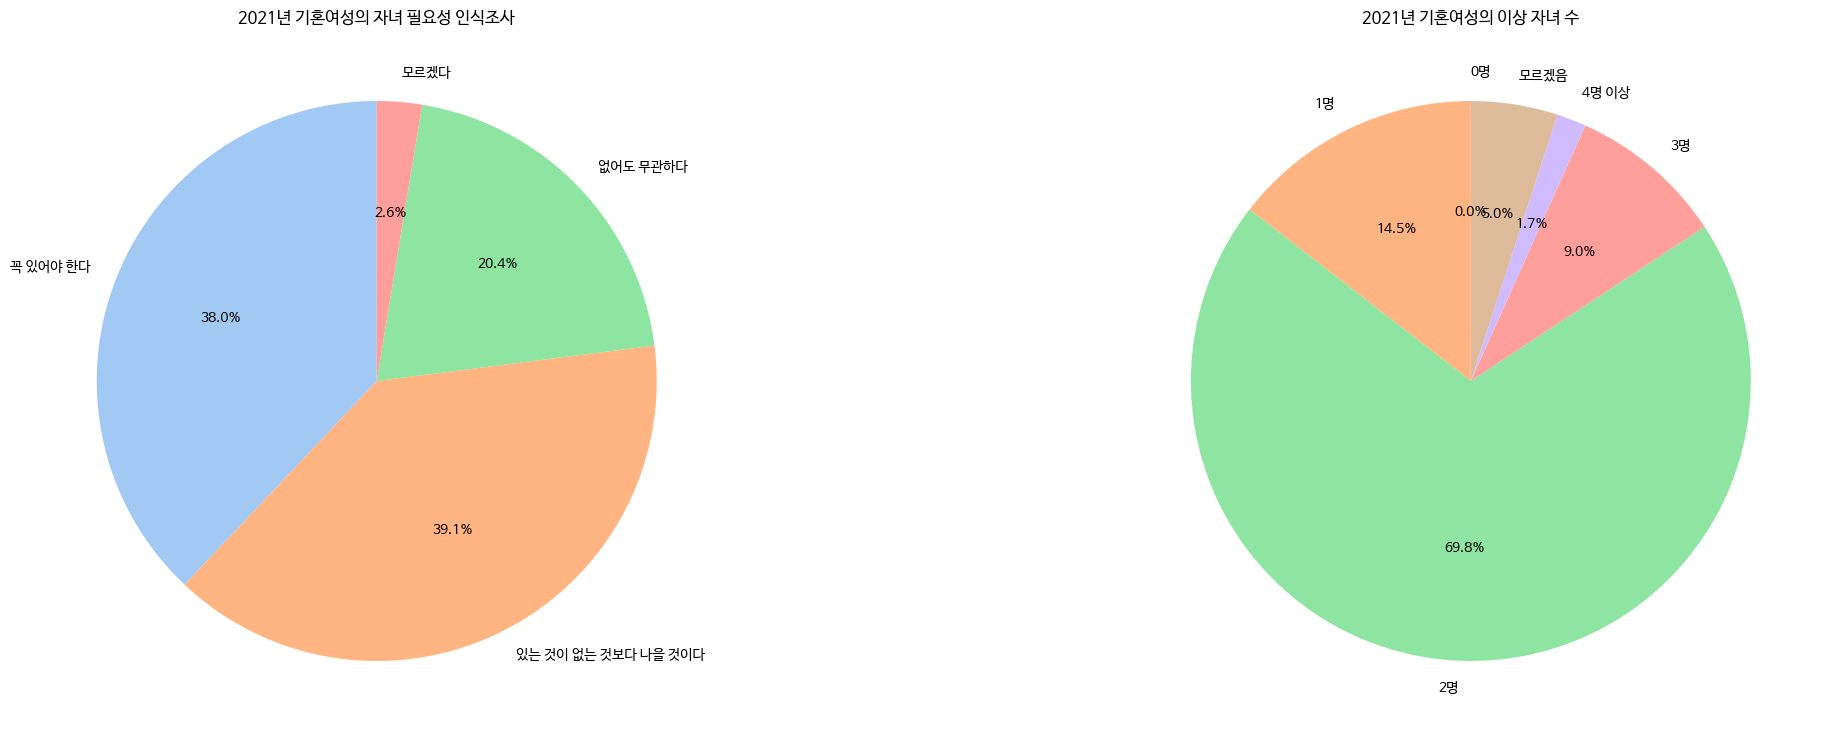

In [44]:
#기혼여성의 자녀에 관한 인식조사 시각화
df_need_childern['응답률(%)'] = pd.to_numeric(df_need_childern['응답률(%)'])
df_num_childern['응답률(%)'] = pd.to_numeric(df_num_childern['응답률(%)'])

worked_hour_sub_plot = plt.figure(figsize=(40, 20))

ax1=worked_hour_sub_plot.add_subplot(2,3,1)
ax2=worked_hour_sub_plot.add_subplot(2,3,2)

#파이차트
ax1.set_title('2021년 기혼여성의 자녀 필요성 인식조사')
ax1.pie(
    df_need_childern["응답률(%)"],
    labels=df_need_childern["응답"],
    autopct="%.1f%%",
    colors=sns.color_palette("pastel"),
    startangle=90
)

ax2.set_title("2021년 기혼여성의 이상 자녀 수")
ax2.pie(
    df_num_childern["응답률(%)"],
    labels=df_num_childern["응답"],
    autopct="%.1f%%",
    colors=sns.color_palette("pastel"),
    startangle=90
)

**데이터 수집**<br>
13.OECD 주택 가격 지수 데이터 수집
- OECD API이용
- XML, CSV, JSON 3가지의 포맷을 제공하지만 XML 데이터만 제대로 받아짐
- 2015년 기준 주택 값 상승률
- 100 초과면 주택 값 상승을 의미
- 100 미만이면 주택 값 하락을 의미

In [45]:
import xml.etree.ElementTree as ET

# API URL 설정
url = (
    "https://sdmx.oecd.org/public/rest/data/" #HOST URL
    "OECD.ECO.MPD,DSD_AN_HOUSE_PRICES@DF_HOUSE_PRICES," #Agency Identifier
    "1.0/OECD+USA+GBR+CHE+TUR+SWE+ESP+SVN+SVK+PRT+POL+NZL+NOR+NLD+MEX+LVA+LTU+LUX+KOR+JPN+HUN+ISR+ITA+IRL+ISL+GRC+DEU+FRA+EST+FIN+DNK+CZE+CRI+CHL+COL+CAN+BEL+AUT+AUS.A.HPI_YDH.?"#Data Section
    "startPeriod=2023&endPeriod=2023&dimensionAtObservation=AllDimensions&format=genericdata"#Other Option
)

# 데이터 요청
response = requests.get(url)


# XML 데이터 파싱
root = ET.fromstring(response.text)

**데이터 가공/정제**<br>
13.OECD주택 가격지수 데이터 가공/정제
- XML에서 Obs를 노드를 기준으로 데이터 탐색
- 각 Obs 노드에서 관측값의 세부 정보를 추출
-- ObsKey: 국가(REF_AREA)와 기간(TIME_PERIOD) 정보를 포함.
-- ObsValue: 실제 관측된 데이터 값.
- 데이터를 기준으로 정렬하기 위해 수치 데이터로 형변환
- 시각화 편하도록 정렬

In [46]:
#데이터 저장 리스트
countries = [] #나라
years = [] #연도
values = [] #집

# 각 'Obs' 항목에서 데이터 추출
for obs in root.findall('.//generic:Obs', namespaces={'generic': 'http://www.sdmx.org/resources/sdmxml/schemas/v2_1/data/generic'}):#관측값 obs를 namespaces에서 찾음
# 기간, 국가, 값 추출
  for obs_key in obs.findall('.//generic:ObsKey', namespaces={'generic': 'http://www.sdmx.org/resources/sdmxml/schemas/v2_1/data/generic'}): #obs를 바탕으로  국가와 기간 값 추출
    for value_elem in obs_key.findall('.//generic:Value', namespaces={'generic': 'http://www.sdmx.org/resources/sdmxml/schemas/v2_1/data/generic'}):
      if value_elem.attrib.get('id') == 'REF_AREA': #국가
        country = value_elem.attrib.get('value')
      if value_elem.attrib.get('id') == 'TIME_PERIOD': #기간
        year = value_elem.attrib.get('value')

  # 값 추출
  obs_value = obs.find('.//generic:ObsValue', namespaces={'generic': 'http://www.sdmx.org/resources/sdmxml/schemas/v2_1/data/generic'})
  if obs_value is not None:
    value = obs_value.attrib.get('value')#주택가격

  # 데이터 리스트에 추가
  if country and year and value:
    countries.append(country)
    years.append(year)
    values.append(value)

# DataFrame으로 변환
df_hous_price = pd.DataFrame({
  'Country': countries,
  'Year': years,
  'Value': values
})

df_hous_price['Value'] = df_hous_price['Value'].astype(float) #데이터 정렬을 위해 수치 데이터로 형변환
df_hous_price = df_hous_price.sort_values(by="Value", ascending=True)

# 데이터 출력
print(df_hous_price.head())

   Country  Year      Value
2      KOR  2023  84.876108
18     FIN  2023  86.077018
7      ITA  2023  87.466423
29     BEL  2023  96.984488
32     POL  2023  98.596399


**데이터 시각화**<br>
13.OECD주택가격 데이터 시각화
- 수평 그래프로 시각화


<BarContainer object of 33 artists>

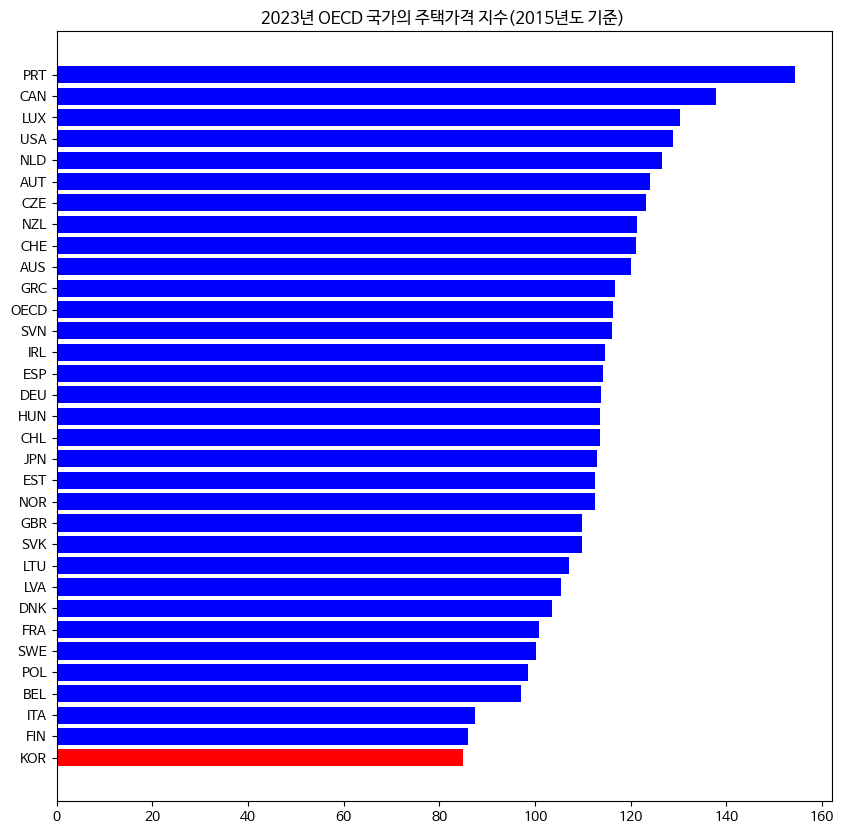

In [47]:
#OECD 주택가격
plt.figure(figsize=(10, 10))

plt.title('2023년 OECD 국가의 주택가격 지수(2015년도 기준) ')
plt.barh(
    df_hous_price['Country'],
    df_hous_price['Value'],
    color=['blue' if country != 'KOR' else 'red' for country in df_hous_price['Country']]
)

**데이터 수집**<br>
14.OECD 국가의 대학 진학 데이터 수집
- OECD API를 활용하여 데이터 수집


In [48]:
#2023 대학 진학률

# API URL 설정
url = (
    "https://sdmx.oecd.org/public/rest/data/"
    "OECD.EDU.IMEP,DSD_EAG_LSO_EA@DF_LSO_NEAC_DISTR_EA,"
    "1.0/IRL+SWE+LUX+AUS+AUT+BEL+CAN+CHL+COL+CRI+CZE+DNK+EST+FIN+FRA+DEU+HUN+ISL+ISR+ITA+JPN+KOR+MEX+NLD+NZL+NOR+POL+PRT+SVK+ESP+CHE+TUR+USA+ARG+BRA+BGR+CHN+HRV+IND+IDN+PER+ROU+ZAF._T+F+M.Y25T64.ISCED11A_5T8..........OBS...A?"
    "startPeriod=2023&endPeriod=2023&lastNObservations=1&dimensionAtObservation=AllDimensions"
)


# 데이터 요청
response = requests.get(url)

# XML 데이터 파싱
root = ET.fromstring(response.text)

**데이터 가공/정제**<br>
14.OECD 대학 진학 데이터 가공/정제
- XML에서 Obs를 노드를 기준으로 데이터 탐색
- 각 Obs 노드에서 관측값의 세부 정보를 추출
-- ObsKey: 국가(REF_AREA)와 기간(TIME_PERIOD),성별(SEX) 정보를 포함.
-- ObsValue: 실제 관측된 데이터 값.
- 결측치가 있는 데이터 삭제
- 성별 종합 데이터는 따로 추출 후 저장(df_education_total)
- df_education_total데이터를 오름차순으로 정렬

In [49]:
# 데이터를 추출하여 pandas DataFrame으로 변환
countries = []
years = []
values = []
genders = []  # 성별 정보를 저장할 리스트 추가

# 각 'Obs' 항목에서 데이터 추출
for obs in root.findall('.//generic:Obs', namespaces={'generic': 'http://www.sdmx.org/resources/sdmxml/schemas/v2_1/data/generic'}):
    country = None
    year = None
    value = None
    gender = None  # 성별 정보 초기화

    # 기간, 국가, 성별 추출
    for obs_key in obs.findall('.//generic:ObsKey', namespaces={'generic': 'http://www.sdmx.org/resources/sdmxml/schemas/v2_1/data/generic'}):
        for value_elem in obs_key.findall('.//generic:Value', namespaces={'generic': 'http://www.sdmx.org/resources/sdmxml/schemas/v2_1/data/generic'}):
            if value_elem.attrib.get('id') == 'REF_AREA':
                country = value_elem.attrib.get('value')
            if value_elem.attrib.get('id') == 'TIME_PERIOD':
                year = value_elem.attrib.get('value')
            if value_elem.attrib.get('id') == 'SEX':  # 성별 데이터 확인
                gender = value_elem.attrib.get('value')

    # 값 추출
    obs_value = obs.find('.//generic:ObsValue', namespaces={'generic': 'http://www.sdmx.org/resources/sdmxml/schemas/v2_1/data/generic'})
    if obs_value is not None:
        value = obs_value.attrib.get('value')

    # 데이터 리스트에 추가
    if country and year and value:
        countries.append(country)
        years.append(year)
        values.append(value)
        genders.append(gender if gender else '_T')  # 성별 정보가 없으면 'Total'로 지정

# DataFrame으로 변환
df_education = pd.DataFrame({
    'Country': countries,
    'Year': years,
    'Value': values,
    'Gender': genders  # 성별 컬럼 추가
})

# 결측치가 있는 행 삭제
df_education = df_education.dropna(subset=['Country', 'Year', 'Value', 'Gender'])

# 'Total' 데이터는 df_education_total에 저장
df_education_total = df_education[df_education['Gender'] == '_T']

# 'Total'을 제외한 성별 데이터를 df_education에 저장
df_education = df_education[df_education['Gender'] != '_T']

#종합 데이터 정렬
df_education_total['Value'] = df_education_total['Value'].astype(float) #데이터 정렬을 위해 수치 데이터로 형변환
df_education_total = df_education_total.sort_values(by="Value", ascending=True)

# 데이터 출력
print(df_education)
print(df_education_total.head())


    Country  Year        Value Gender
0       NZL  2023  45.28720474      F
2       CHE  2023   43.6150322      F
5       ARG  2023   27.3559494      F
6       POL  2023  31.25423813      M
7       CAN  2023  70.11159515      F
..      ...   ...          ...    ...
109     NLD  2023  45.91274643      F
110     CHE  2023  48.41028214      M
112     ESP  2023  44.97808075      F
113     IRL  2023  51.54682541      M
115     IRL  2023  58.91493225      F

[78 rows x 4 columns]
    Country  Year      Value Gender
83      IND  2023  14.246305     _T
72      ROU  2023  18.625801     _T
59      MEX  2023  20.962671     _T
90      BRA  2023  21.535778     _T
114     ITA  2023  21.582544     _T


**데이터 시각화**<br>
14.OECD 대학 진학 데이터 시각화
- 서브플롯으로 가독성 높이기
- 남녀의 각가 대학 진학률의 시각화는 군집형 막대 그래프로 시각화
- 남녀 전체의 평균 대학 진학률은 수평 막대 그래프로 시각화

<BarContainer object of 39 artists>

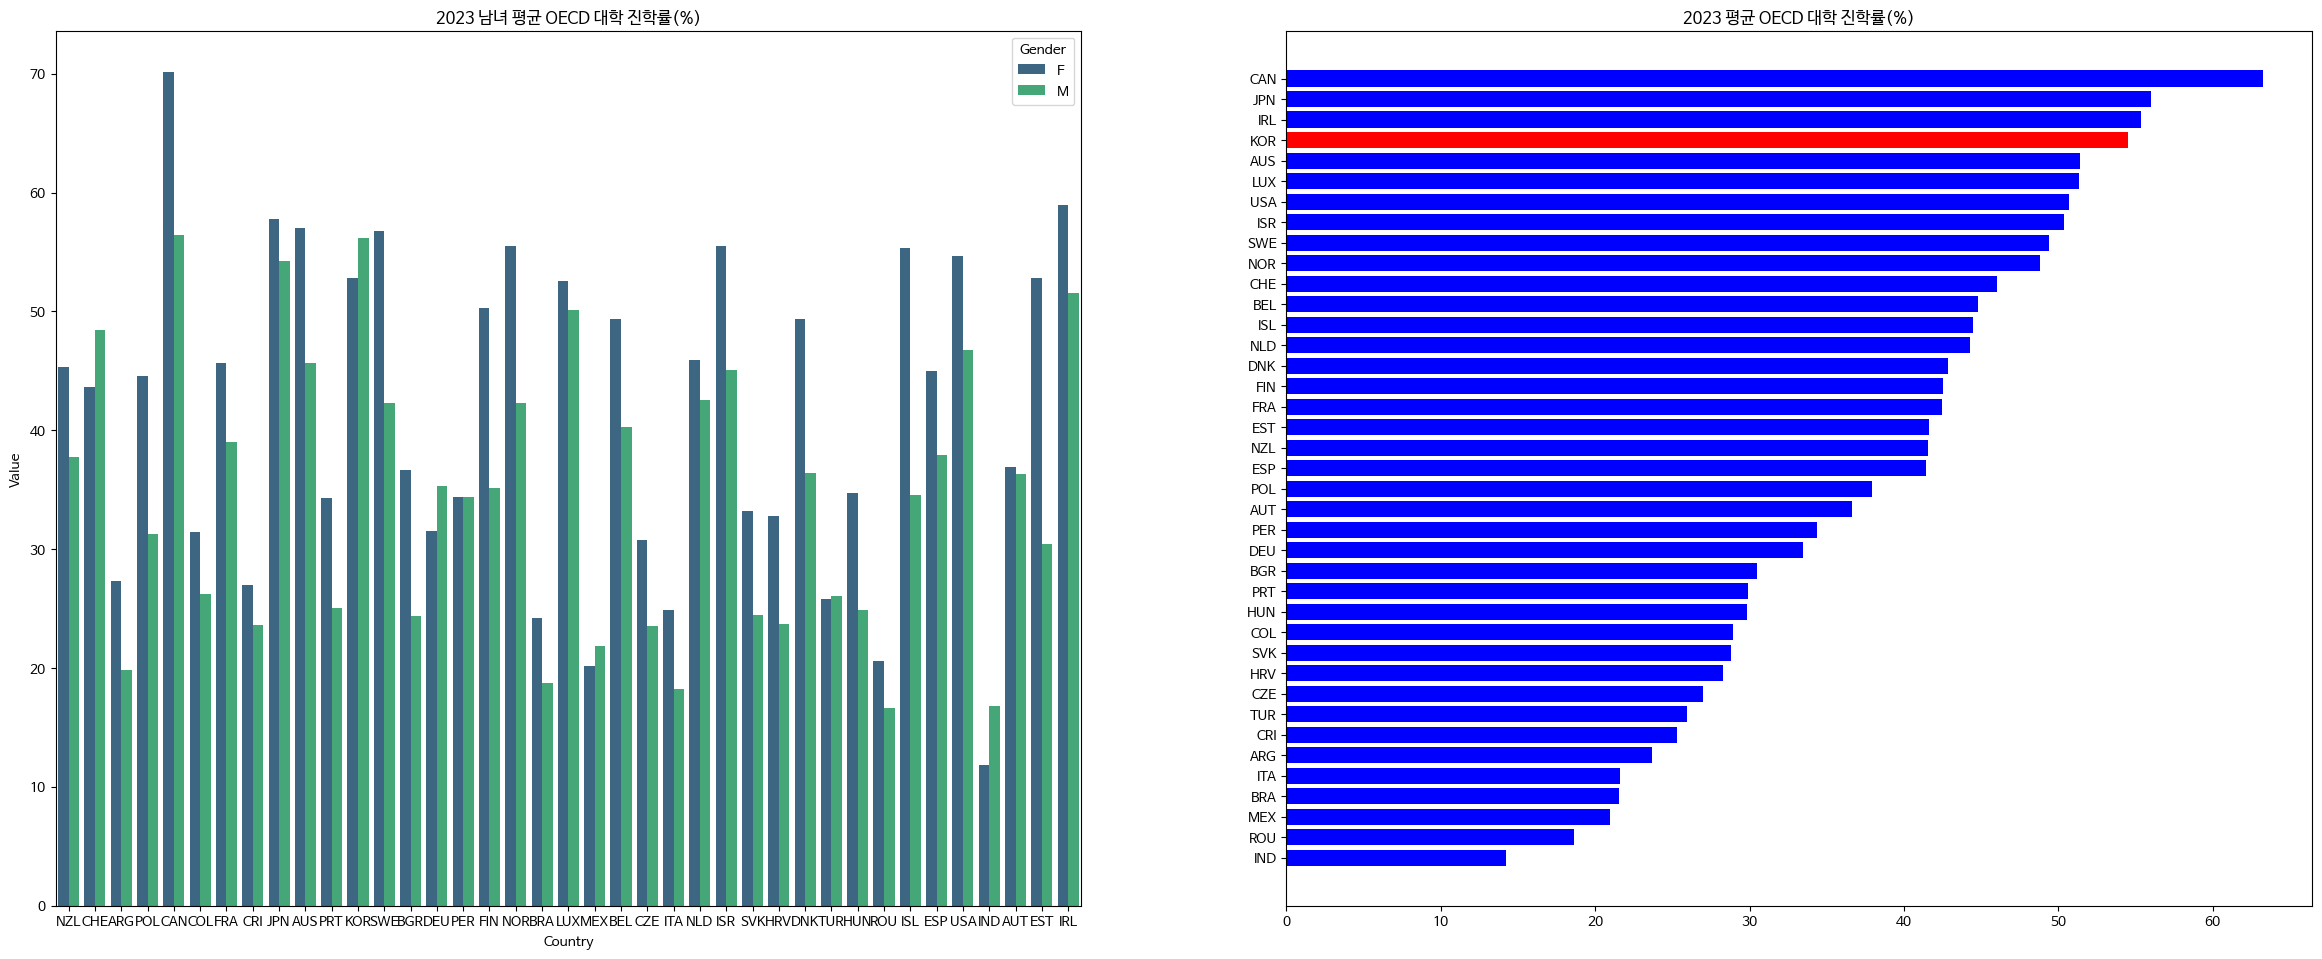

In [50]:
#OECD 대학 진학률 데이터 시각화
df_education['Value'] = pd.to_numeric(df_education['Value'])#수치 데이터로 변환

worked_hour_sub_plot = plt.figure(figsize=(45, 25))

ax1=worked_hour_sub_plot.add_subplot(2,3,1)
ax2=worked_hour_sub_plot.add_subplot(2,3,2)

#파이차트 시각화
ax1.set_title('2023 남녀 평균 OECD 대학 진학률(%)')
# 군집형 막대 그래프
sns.barplot(data=df_education, x='Country', y='Value', hue='Gender', palette='viridis', ax=ax1)

ax2.set_title("2023 평균 OECD 대학 진학률(%)")

ax2.barh(
    df_education_total['Country'],
    df_education_total['Value'],
    color=['blue' if country != 'KOR' else 'red' for country in df_education_total['Country']]
)
